In [1]:
import os
import xarray as xr
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
from windrose import WindroseAxes

repertoire_courant=os.getcwd()
repertoire_figures=repertoire_courant+r"\\"+r"figures"+r"\\"
print(repertoire_courant)
repertoire_fichiers=repertoire_courant+r"\Outputs_EddyPro"+r"\\"
print("chargement des données")
T2_1_2min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_1_2min_full_output.nc")
T2_2_2min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_2_2min_full_output.nc")
T2_3_2min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_3_2min_full_output.nc")

spectres_1_2min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_1_2min_spectres.nc")
spectres_2_2min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_2_2min_spectres.nc")
spectres_3_2min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_3_2min_spectres.nc")

spectres_1_30min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_1_30min_spectres.nc")
spectres_2_30min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_2_30min_spectres.nc")
spectres_3_30min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_3_30min_spectres.nc")



T2_1_2min=T2_1_2min.assign(wind_dir=(T2_1_2min['wind_dir']+180)%360)
T2_2_2min=T2_2_2min.assign(wind_dir=(T2_2_2min['wind_dir']+180)%360)
T2_3_2min=T2_3_2min.assign(wind_dir=(T2_3_2min['wind_dir']+180)%360)



T2_1_30min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_1_30min_full_output.nc")
T2_2_30min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_2_30min_full_output.nc")
T2_3_30min=xr.open_dataset(repertoire_fichiers+r"T2_TO5_3_30min_full_output.nc")

T2_1_30min=T2_1_30min.assign(wind_dir=(T2_1_30min['wind_dir']+180)%360)
T2_2_30min=T2_2_30min.assign(wind_dir=(T2_2_30min['wind_dir']+180)%360)
T2_3_30min=T2_3_30min.assign(wind_dir=(T2_3_30min['wind_dir']+180)%360)

def Ri_B(U,V,T_z,T_s,z):
    "retourne le nombre de Richardson Bulk, avec T_z et T_s les températures à la hauteur z et en surface (en K)"
    return (9.81*(T_z-T_s)*z)/(T_s*(U**2+V**2))


Ri_1_30min=Ri_B(T2_1_30min['u_mean'].values,T2_1_30min['v_mean'].values,T2_1_30min['ts_mean'].values,
          273.15,T2_1_30min['instrument_height'].values)
Ri_2_30min=Ri_B(T2_2_30min['u_mean'].values,T2_2_30min['v_mean'].values,T2_2_30min['ts_mean'].values,
          273.15,T2_2_30min['instrument_height'].values)
Ri_3_30min=Ri_B(T2_3_30min['u_mean'].values,T2_3_30min['v_mean'].values,T2_3_30min['ts_mean'].values,
          273.15,T2_3_30min['instrument_height'].values)

Ri_1_2min=Ri_B(T2_1_2min['u_mean'].values,T2_1_2min['v_mean'].values,T2_1_2min['ts_mean'].values,
          273.15,T2_1_2min['instrument_height'].values)
Ri_2_2min=Ri_B(T2_2_2min['u_mean'].values,T2_2_2min['v_mean'].values,T2_2_2min['ts_mean'].values,
          273.15,T2_2_2min['instrument_height'].values)
Ri_3_2min=Ri_B(T2_3_2min['u_mean'].values,T2_3_2min['v_mean'].values,T2_3_2min['ts_mean'].values,
          273.15,T2_3_2min['instrument_height'].values)

print(T2_1_2min)
print(T2_1_2min.data_vars)
print("fait")

C:\Users\evanl\Documents\Stage IGE
chargement des données
<xarray.Dataset>
Dimensions:                  (temps: 5400)
Coordinates:
  * temps                    (temps) datetime64[ns] 2023-09-01T00:02:00 ... 2...
Data variables: (12/76)
    daytime                  (temps) float64 ...
    Tau                      (temps) float64 ...
    qc_Tau                   (temps) float64 ...
    H                        (temps) float64 ...
    qc_H                     (temps) float64 ...
    H_strg                   (temps) float64 ...
    ...                       ...
    v_mean.1                 (temps) float64 ...
    w_mean.1                 (temps) float64 ...
    ts_mean.1                (temps) float64 ...
    instrument_height        (temps) float64 1.03 1.03 1.03 ... 1.03 1.03 1.03
    wu_cov                   (temps) float64 ...
    vw_cov                   (temps) float64 ...
Data variables:
    daytime                  (temps) float64 ...
    Tau                      (temps) float64 ..

(0.0, 0.3)

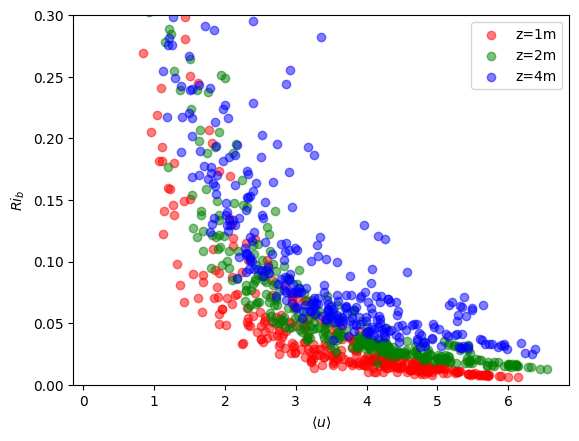

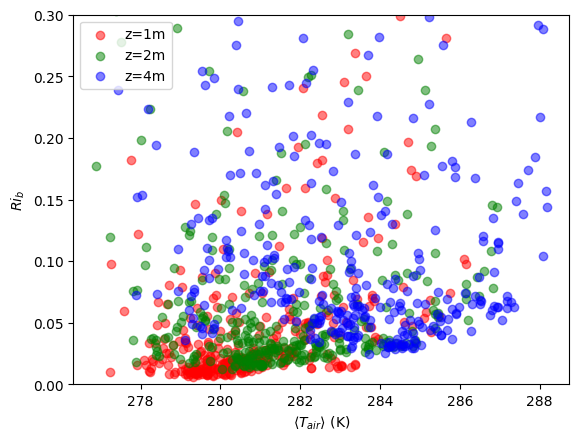

In [2]:
fig=plt.figure()
plt.scatter(T2_1_30min['u_rot'].values,Ri_1_30min,color='r',label='z=1m',alpha=0.5)
plt.scatter(T2_2_30min['u_rot'].values,Ri_2_30min,color='g',label='z=2m',alpha=0.5)
plt.scatter(T2_3_30min['u_rot'].values,Ri_3_30min,color='b',label='z=4m',alpha=0.5)
plt.xlabel(r"$\langle u \rangle$")
plt.ylabel(r"$Ri_b$")
plt.legend()
plt.ylim(0,0.3)

fig=plt.figure()
plt.scatter(T2_1_30min['air_temperature'].values,Ri_1_30min,color='r',label='z=1m',alpha=0.5)
plt.scatter(T2_2_30min['air_temperature'].values,Ri_2_30min,color='g',label='z=2m',alpha=0.5)
plt.scatter(T2_3_30min['air_temperature'].values,Ri_3_30min,color='b',label='z=4m',alpha=0.5)
plt.xlabel(r"$\langle T_{air} \rangle$ (K)")
plt.ylabel(r"$Ri_b$")
plt.legend()
plt.ylim(0,0.3)

<Figure size 640x480 with 0 Axes>

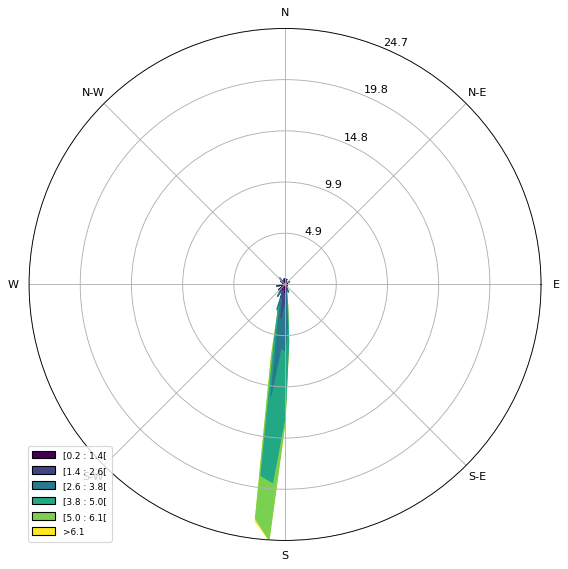

<Figure size 640x480 with 0 Axes>

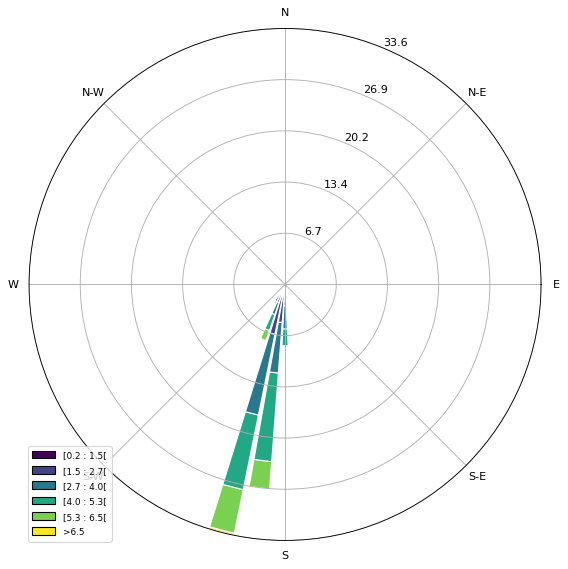

<Figure size 640x480 with 0 Axes>

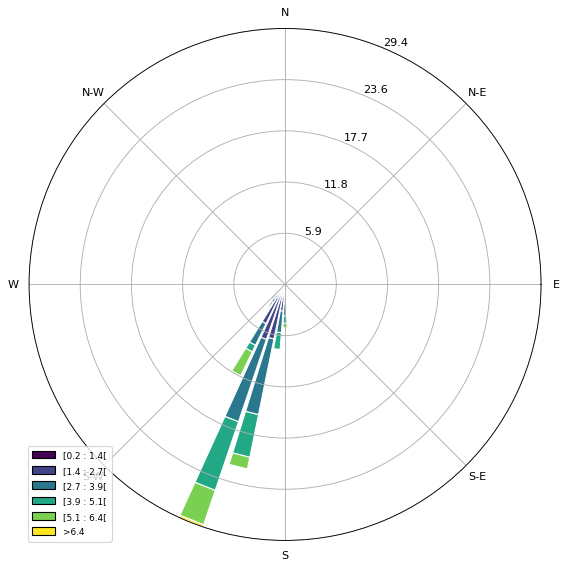

In [3]:

fig=plt.figure()
ax=WindroseAxes.from_ax()
ax.contourf(T2_1_30min['wind_dir'].values, T2_1_30min['wind_speed'].values, normed=True,blowto=False,nsector=100, edgecolor="white")
#ax.contour(T2_1_30min['wind_dir'].values, T2_1_30min['wind_speed'].values, normed=True,blowto=True,nsector=100)
ax.set_radii_angle()
ax.set_legend()
#plt.savefig(repertoire_courant+r"\figures"+r"\\"+"windrose_1m.png")

fig=plt.figure()
ax=WindroseAxes.from_ax()
ax.bar(T2_2_30min['wind_dir'].values, T2_2_30min['wind_speed'].values, normed=True,blowto=False, 
       opening=0.8,nsector=50, edgecolor="white")
ax.set_radii_angle()
ax.set_legend()

fig=plt.figure()
ax=WindroseAxes.from_ax()
ax.bar(T2_3_30min['wind_dir'].values, T2_3_30min['wind_speed'].values, normed=True,blowto=False, 
       opening=0.8,nsector=50, edgecolor="white")
ax.set_radii_angle()
ax.set_legend()

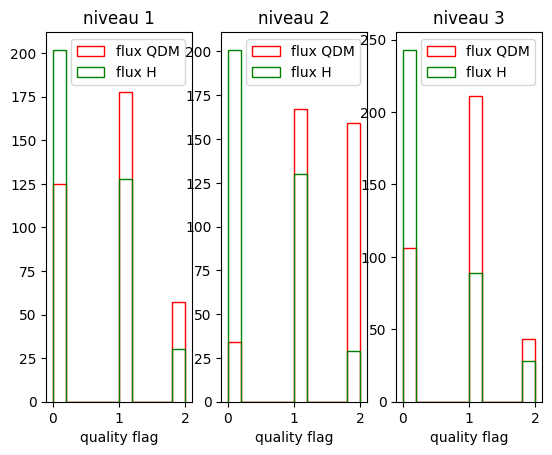

In [4]:


fig=plt.figure()
ax1=plt.subplot(131)
ax1.set_title("niveau 1")
ax1.hist(T2_1_30min['qc_Tau'].values,color='r',histtype='step',
        label='flux QDM')
ax1.hist(T2_1_30min['qc_H'].values,color='g',histtype='step',
        label='flux H')
#plt.hist(T2_1_30min['qc_LE'].values,color='b',histtype='stepfilled',
        #label='flux LE')
ax1.set_xlabel("quality flag")
ax1.legend()

ax2=plt.subplot(132)
ax2.set_title("niveau 2")
ax2.hist(T2_2_30min['qc_Tau'].values,color='r',histtype='step',
        label='flux QDM')
ax2.hist(T2_2_30min['qc_H'].values,color='g',histtype='step',
        label='flux H')
ax2.set_xlabel("quality flag")
ax2.legend()

ax3=plt.subplot(133)
ax3.set_title("niveau 3")
ax3.hist(T2_3_30min['qc_Tau'].values,color='r',histtype='step',
        label='flux QDM')
ax3.hist(T2_3_30min['qc_H'].values,color='g',histtype='step',
        label='flux H')
#plt.hist(T2_1_30min['qc_LE'].values,color='b',histtype='stepfilled',
        #label='flux LE')
ax3.set_xlabel("quality flag")
ax3.legend()

In [5]:
#sélection des flux selon le niveau de qualité (cf manuel EddyPro)
#0 : Bon
#1 : Mauvais (mais passe quand même)
#2 : A rejeter

flag_01=lambda x:((x['qc_Tau']<2) & (x['qc_H'] <2))#renvoie True si qc_tau et qc_H =(0,1)

flag_00=lambda x:((x['qc_Tau']<1) & (x['qc_H'] <1))#idem mais seulement pour qc_tau et qc_H =0

def niveaux_qc(level_1,level_2,level_3,func_flag=flag_01):
    """
    renvoie les Datasets pour les trois niveaux avec seulement les échantillons ayant passé
    le contrôle qualité
    """
    masque_flag= func_flag(level_1) & func_flag(level_2) & func_flag(level_3)
    return level_1.where(masque_flag,drop=True), level_2.where(masque_flag,drop=True), level_3.where(masque_flag,drop=True)
    #return masque_flag
print("sélection des échantillons passant le contrôle qualité")
T2_1_30min_sel,T2_2_30min_sel,T2_3_30min_sel=niveaux_qc(T2_1_30min,T2_2_30min,T2_3_30min,func_flag=flag_01)
T2_1_2min_sel,T2_2_2min_sel,T2_3_2min_sel=niveaux_qc(T2_1_2min,T2_2_2min,T2_3_2min,func_flag=flag_01)
print("fait")

sélection des échantillons passant le contrôle qualité
fait


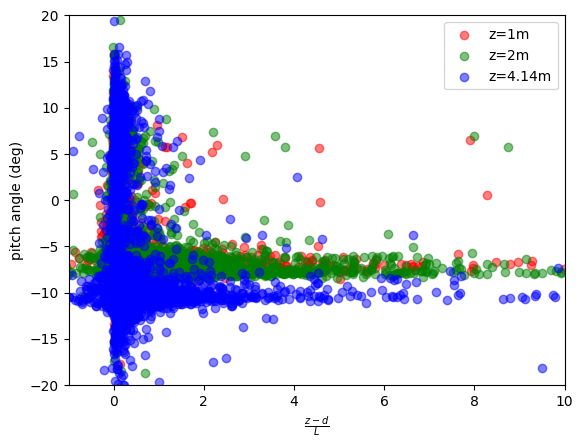

In [6]:
fig=plt.figure()
plt.scatter(T2_1_2min['zL'].values,T2_1_2min['pitch'].values,color='r',alpha=0.5,label="z=1m")
plt.scatter(T2_2_2min['zL'].values,T2_2_2min['pitch'].values,color='g',alpha=0.5,label="z=2m")
plt.scatter(T2_3_2min['zL'].values,T2_3_2min['pitch'].values,color='b',alpha=0.5,label="z=4.14m")
plt.xlabel(r'$\frac{z-d}{L}$')
plt.ylabel('pitch angle (deg)')
plt.xlim(-1,10)
plt.ylim(-20,20)
plt.legend()

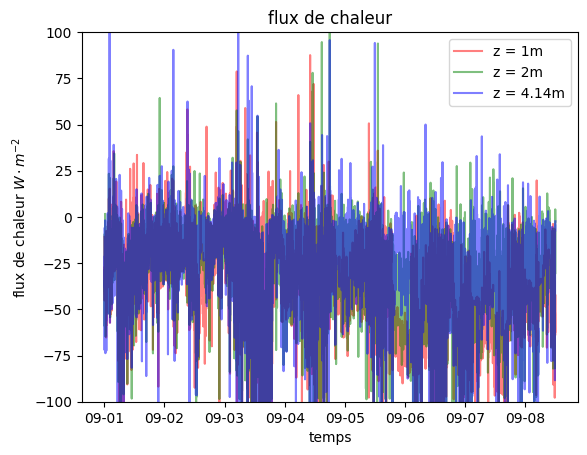

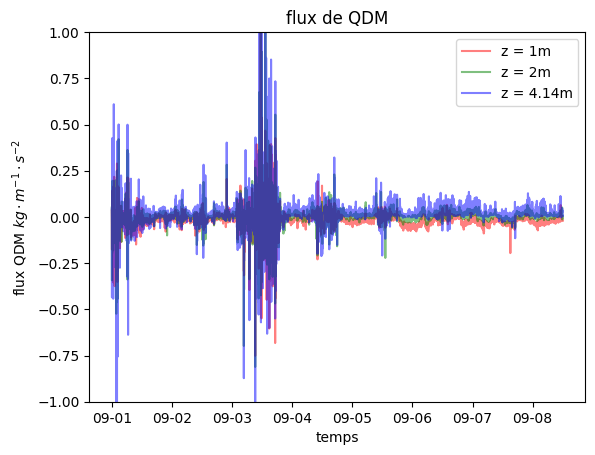

In [7]:
date_format=mpl.dates.DateFormatter("%m-%d")

tps_2min=T2_1_2min.coords['temps'].values

fig=plt.figure()
ax1=plt.subplot(111)
ax1.set_title("flux de chaleur")
ax1.plot(tps_2min,T2_1_2min['H'].values,color='r', label='z = 1m',alpha=0.5)
ax1.plot(tps_2min,T2_2_2min['H'].values,color='g',label='z = 2m',alpha=0.5)
ax1.plot(tps_2min,T2_3_2min['H'].values,color='b',label='z = 4.14m',alpha=0.5)
ax1.xaxis.set_major_formatter(date_format)
ax1.set_xlabel("temps")
ax1.set_ylabel(r"flux de chaleur $W\cdot m^{-2}$")
ax1.set_ylim(-100,100)
ax1.legend()

fig=plt.figure()
ax2=plt.subplot(111)
ax2.set_title("flux de QDM")
ax2.plot(tps_2min,T2_1_2min['Tau'].values,color='r', label='z = 1m',alpha=0.5)
ax2.plot(tps_2min,T2_2_2min['Tau'].values,color='g',label='z = 2m',alpha=0.5)
ax2.plot(tps_2min,T2_3_2min['Tau'].values,color='b',label='z = 4.14m',alpha=0.5)
ax2.xaxis.set_major_formatter(date_format)
ax2.set_xlabel("temps")
ax2.set_ylabel(r"flux QDM $kg\cdot m^{-1} \cdot s^{-2}$")
ax2.set_ylim(-1,1)
ax2.legend()

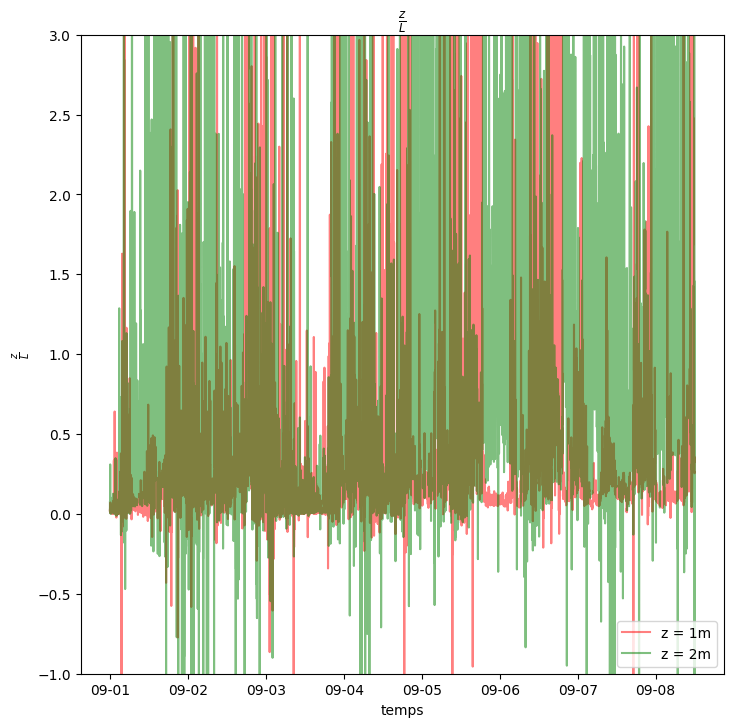

In [8]:
tps_2min=T2_1_2min.coords['temps'].values
fig=plt.figure(figsize=(8.3,8.3))
ax2=plt.subplot(111)
ax2.set_title(r"$\frac{z}{L}$")
ax2.plot(tps_2min,T2_1_2min['zL'].values,color='r', label='z = 1m',alpha=0.5)
ax2.plot(tps_2min,T2_2_2min['zL'].values,color='g',label='z = 2m',alpha=0.5)
#ax2.plot(tps_2min,T2_3_2min['zL'].values,color='b',label='z = 4.14m',alpha=0.5)
ax2.xaxis.set_major_formatter(date_format)
ax2.set_xlabel("temps")
ax2.set_ylabel(r"$\frac{z}{L}$")
ax2.set_ylim(-1,3)
ax2.legend()

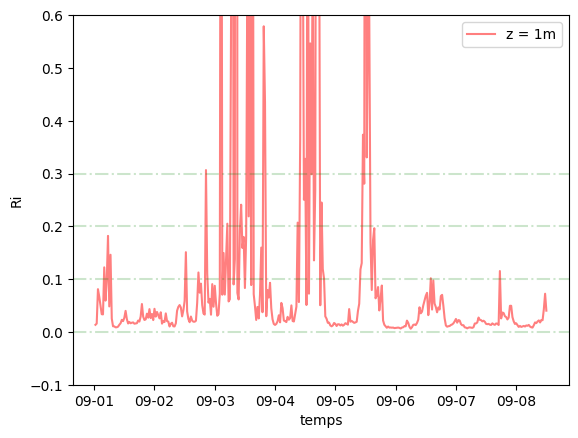

In [9]:
tps_30min=T2_1_30min.coords['temps'].values
fig=plt.figure()
ax1=plt.subplot(111)
ax1.plot(tps_30min,Ri_1_30min,color='r', label='z = 1m',alpha=0.5)
#ax1.plot(tps_30min,Ri_2_30min,color='g',label='z = 2m',alpha=0.5)
#ax1.plot(tps_30min,Ri_3_30min,color='b',label='z = 4.14m',alpha=0.5)
ax1.xaxis.set_major_formatter(date_format)
ax1.set_xlabel("temps")
ax1.set_ylabel(r"Ri")
ax1.set_ylim(-0.1,0.6)
ax1.axhline(0.0,linestyle='-.',color='g',alpha=0.2)
ax1.axhline(0.1,linestyle='-.',color='g',alpha=0.2)
ax1.axhline(0.2,linestyle='-.',color='g',alpha=0.2)
ax1.axhline(0.3,linestyle='-.',color='g',alpha=0.2)
ax1.legend()
#plt.savefig(repertoire_figures+"T2TO5_evolution_Ri.png")

Text(0, 0.5, '$R_b$')

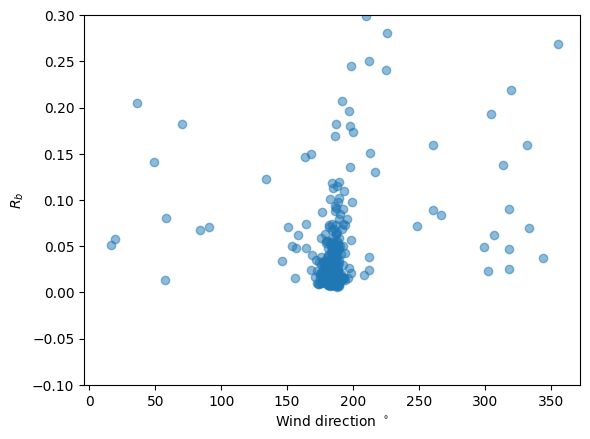

In [10]:
fig=plt.figure()
plt.scatter(T2_1_30min['wind_dir'].values,Ri_1_30min,alpha=0.5)
plt.ylim(-0.1,0.3)
plt.xlabel(r"Wind direction $^\circ$")
plt.ylabel(r"$R_b$")

erreur sur flux calculés sur 30 minutes
0 : bon
1 : à rejeter


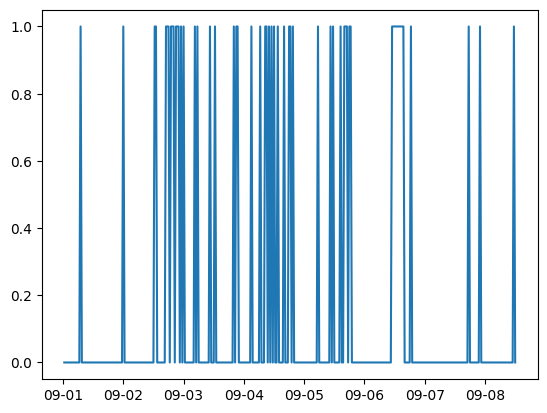

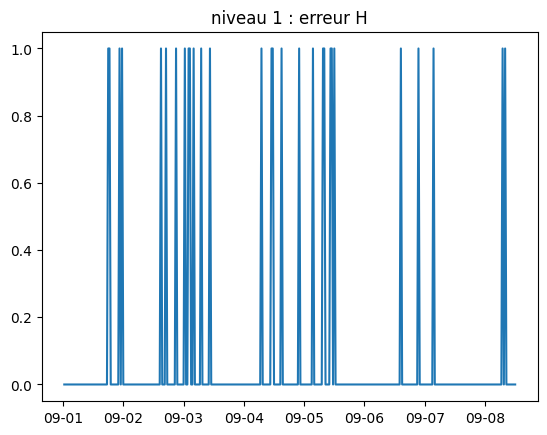

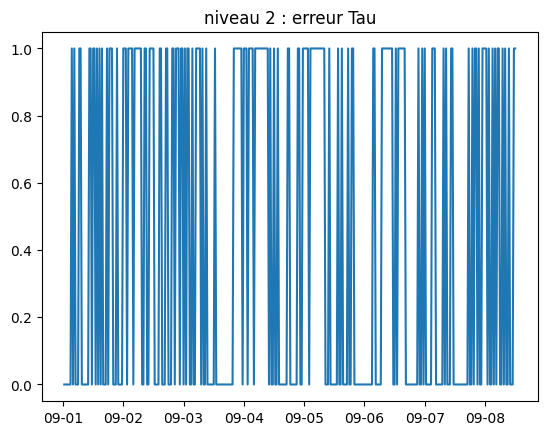

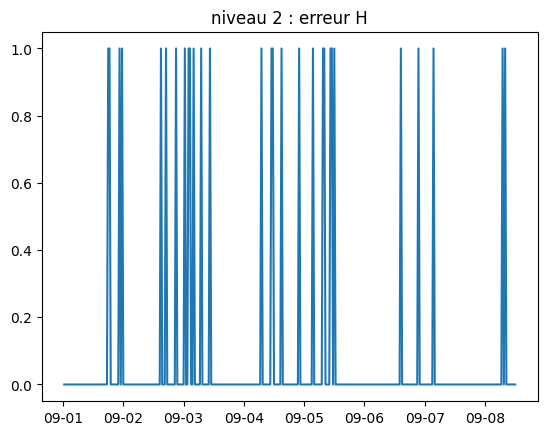

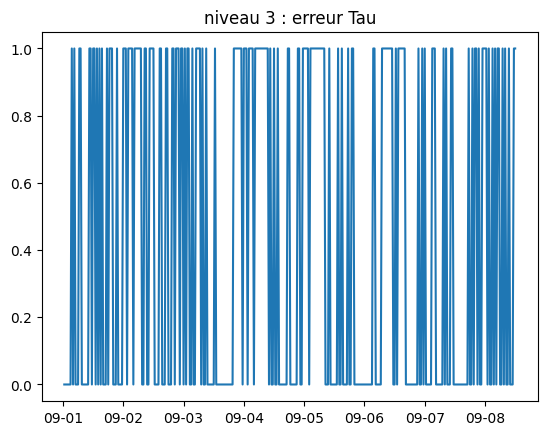

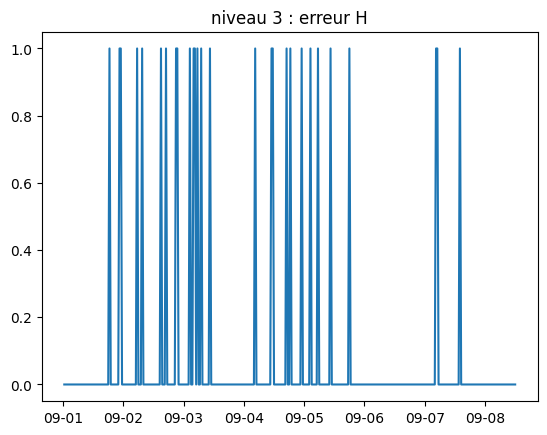

In [11]:
err_Tau_2=xr.where(T2_2_30min['qc_Tau']==2,True,False)
err_H_2=xr.where(T2_2_30min['qc_H']==2,True,False)

err_Tau_1=xr.where(T2_1_30min['qc_Tau']==2,True,False)
err_H_1=xr.where(T2_1_30min['qc_H']==2,True,False)

err_Tau_3=xr.where(T2_3_30min['qc_Tau']==2,True,False)
err_H_3=xr.where(T2_3_30min['qc_H']==2,True,False)

print("erreur sur flux calculés sur 30 minutes")
print("0 : bon")
print("1 : à rejeter")

date_format=mpl.dates.DateFormatter("%m-%d")
tps=err_Tau_3.coords['temps'].values
fig=plt.figure()
ax1.set_title("niveau 1 : erreur Tau")
ax1=plt.subplot(111)
ax1.plot(tps,err_Tau_1)
ax1.xaxis.set_major_formatter(date_format)

fig=plt.figure()
ax2=plt.subplot(111)
ax2.set_title("niveau 1 : erreur H")
ax2.plot(tps,err_H_2)
ax2.xaxis.set_major_formatter(date_format)

fig=plt.figure()
ax3=plt.subplot(111)
ax3.set_title("niveau 2 : erreur Tau")
ax3.plot(tps,err_Tau_2)
ax3.xaxis.set_major_formatter(date_format)

fig=plt.figure()
ax4=plt.subplot(111)
ax4.set_title("niveau 2 : erreur H")
ax4.plot(tps,err_H_2)
ax4.xaxis.set_major_formatter(date_format)

fig=plt.figure()
ax5=plt.subplot(111)
ax5.set_title("niveau 3 : erreur Tau")
ax5.plot(tps,err_Tau_2)
ax5.xaxis.set_major_formatter(date_format)

fig=plt.figure()
ax6=plt.subplot(111)
ax6.set_title("niveau 3 : erreur H")
ax6.plot(tps,err_H_3)
ax6.xaxis.set_major_formatter(date_format)

erreur sur flux calculés sur 2 minutes
0 : bon
1 : à rejeter


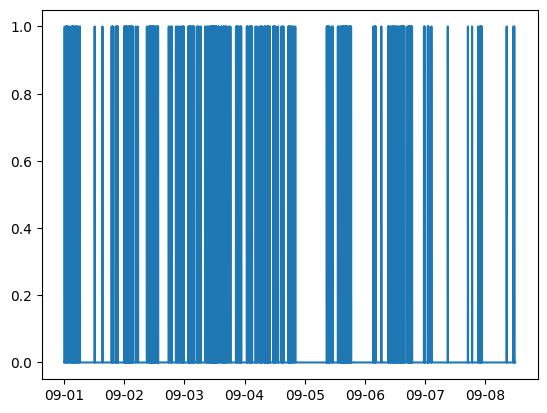

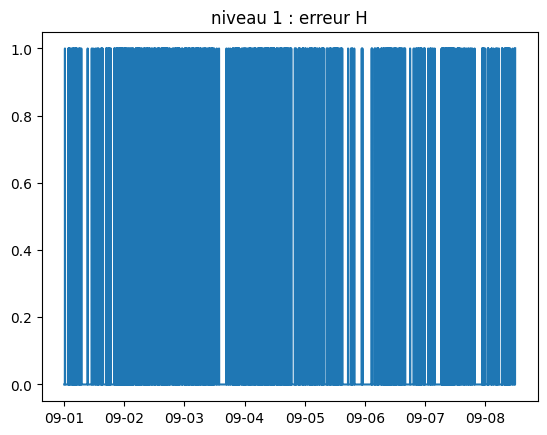

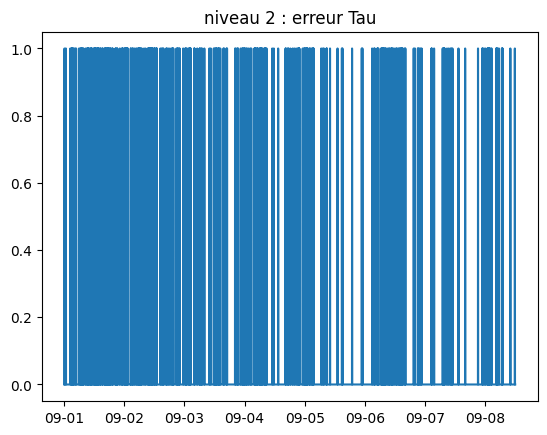

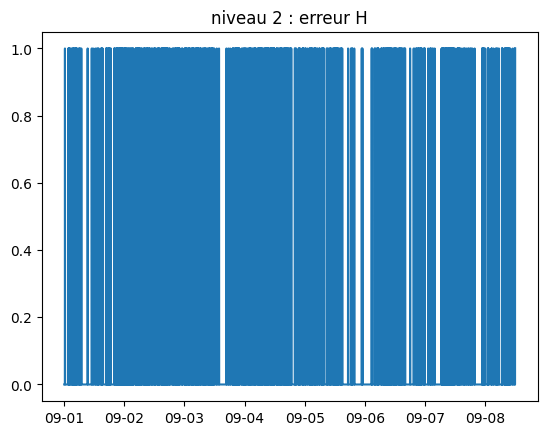

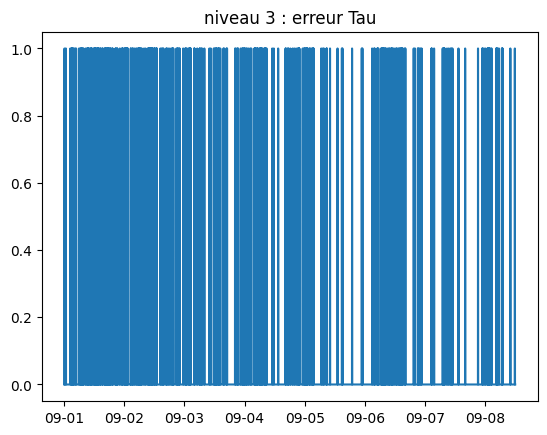

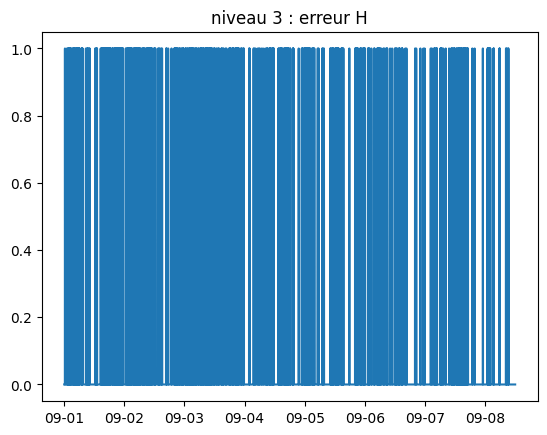

In [12]:
err_Tau_2=xr.where(T2_2_2min['qc_Tau']==2,True,False)
err_H_2=xr.where(T2_2_2min['qc_H']==2,True,False)

err_Tau_1=xr.where(T2_1_2min['qc_Tau']==2,True,False)
err_H_1=xr.where(T2_1_2min['qc_H']==2,True,False)

err_Tau_3=xr.where(T2_3_2min['qc_Tau']==2,True,False)
err_H_3=xr.where(T2_3_2min['qc_H']==2,True,False)

print("erreur sur flux calculés sur 2 minutes")
print("0 : bon")
print("1 : à rejeter")
date_format=mpl.dates.DateFormatter("%m-%d")
tps=err_Tau_3.coords['temps'].values
fig=plt.figure()
ax1.set_title("niveau 1 : erreur Tau")
ax1=plt.subplot(111)
ax1.plot(tps,err_Tau_1)
ax1.xaxis.set_major_formatter(date_format)

fig=plt.figure()
ax2=plt.subplot(111)
ax2.set_title("niveau 1 : erreur H")
ax2.plot(tps,err_H_2)
ax2.xaxis.set_major_formatter(date_format)

fig=plt.figure()
ax3=plt.subplot(111)
ax3.set_title("niveau 2 : erreur Tau")
ax3.plot(tps,err_Tau_2)
ax3.xaxis.set_major_formatter(date_format)

fig=plt.figure()
ax4=plt.subplot(111)
ax4.set_title("niveau 2 : erreur H")
ax4.plot(tps,err_H_2)
ax4.xaxis.set_major_formatter(date_format)

fig=plt.figure()
ax5=plt.subplot(111)
ax5.set_title("niveau 3 : erreur Tau")
ax5.plot(tps,err_Tau_2)
ax5.xaxis.set_major_formatter(date_format)

fig=plt.figure()
ax6=plt.subplot(111)
ax6.set_title("niveau 3 : erreur H")
ax6.plot(tps,err_H_3)
ax6.xaxis.set_major_formatter(date_format)

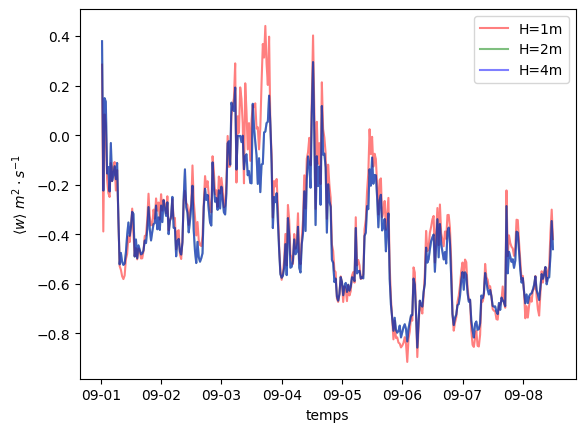

In [13]:
date_format=mpl.dates.DateFormatter("%m-%d")
#date_format=mpl.dates.DateFormatter("%H")
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2_1_30min.coords['temps'].values,T2_1_30min['w_mean'].values,color='r',label="H=1m",alpha=0.5)
ax.plot(T2_2_30min.coords['temps'].values,T2_2_30min['w_mean'].values,color='g',label="H=2m",alpha=0.5)
ax.plot(T2_3_30min.coords['temps'].values,T2_3_30min['w_mean'].values,color='b',label="H=4m",alpha=0.5)
ax.legend()
ax.set_xlabel("temps")
ax.set_ylabel(r"$\langle w \rangle$ $m^2\cdot s^{-1}$")
#ax.set_ylim(0.0,0.4)
#plt.xlim(right=np.datetime64('2023-09-01 18:00:00'),left=np.datetime64('2023-09-02 18:00:00'))
#ax.set_ylim(200-30,200+30)
ax.xaxis.set_major_formatter(date_format)

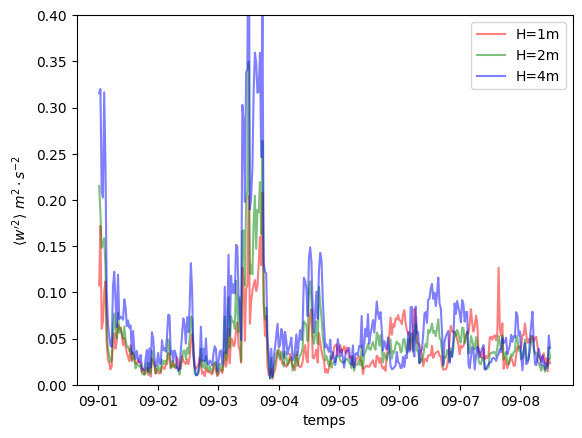

In [14]:
date_format=mpl.dates.DateFormatter("%m-%d")
#date_format=mpl.dates.DateFormatter("%H")
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2_1_30min.coords['temps'].values,T2_1_30min['w_var'].values,color='r',label="H=1m",alpha=0.5)
ax.plot(T2_2_30min.coords['temps'].values,T2_2_30min['w_var'].values,color='g',label="H=2m",alpha=0.5)
ax.plot(T2_3_30min.coords['temps'].values,T2_3_30min['w_var'].values,color='b',label="H=4m",alpha=0.5)

ax.legend()
ax.set_xlabel("temps")
ax.set_ylabel(r"$\langle w'^2 \rangle$ $m^2\cdot s^{-2}$")
ax.set_ylim(0.0,0.4)
#plt.xlim(right=np.datetime64('2023-09-01 18:00:00'),left=np.datetime64('2023-09-02 18:00:00'))
#ax.set_ylim(200-30,200+30)
ax.xaxis.set_major_formatter(date_format)


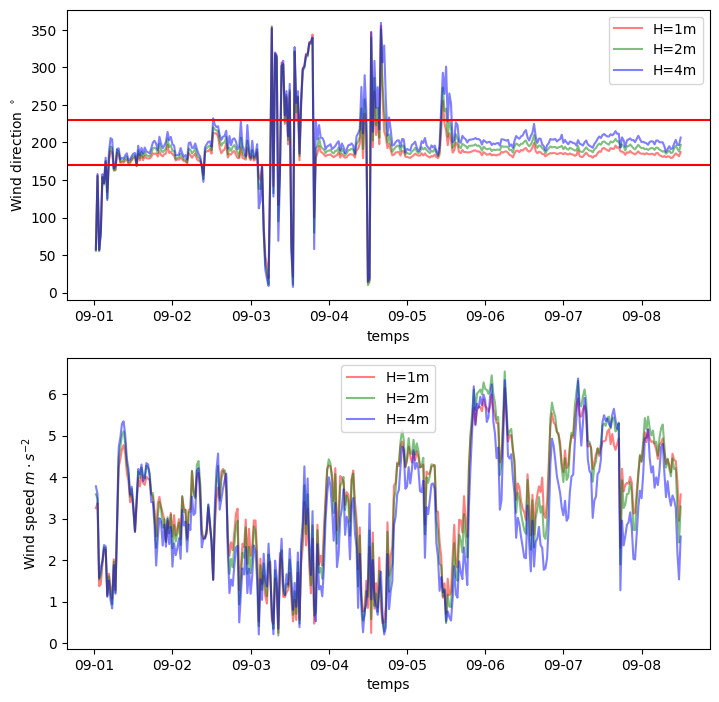

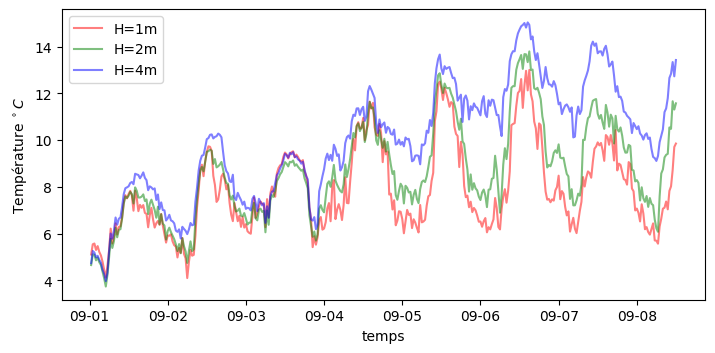

In [15]:
date_format=mpl.dates.DateFormatter("%m-%d")
#date_format=mpl.dates.DateFormatter("%H")
fig=plt.figure(figsize=(8.3,8.3))
ax = fig.add_subplot(211)
ax.plot(T2_1_30min.coords['temps'].values,T2_1_30min['wind_dir'].values,color='r',label="H=1m",alpha=0.5)
ax.plot(T2_2_30min.coords['temps'].values,T2_2_30min['wind_dir'].values,color='g',label="H=2m",alpha=0.5)
ax.plot(T2_3_30min.coords['temps'].values,T2_3_30min['wind_dir'].values,color='b',label="H=4m",alpha=0.5)
ax.axhline(200+30,color='r')
ax.axhline(200-30,color='r')
ax.legend()
ax.set_xlabel("temps")
ax.set_ylabel(r"Wind direction $^\circ$")
#plt.xlim(right=np.datetime64('2023-09-01 18:00:00'),left=np.datetime64('2023-09-02 18:00:00'))
#ax.set_ylim(200-30,200+30)
ax.xaxis.set_major_formatter(date_format)

ax4 = fig.add_subplot(212)
ax4.plot(T2_1_30min.coords['temps'].values,T2_1_30min['wind_speed'].values,color='r',label="H=1m",alpha=0.5)
ax4.plot(T2_2_30min.coords['temps'].values,T2_2_30min['wind_speed'].values,color='g',label="H=2m",alpha=0.5)
ax4.plot(T2_3_30min.coords['temps'].values,T2_3_30min['wind_speed'].values,color='b',label="H=4m",alpha=0.5)
ax4.legend()
ax4.set_xlabel("temps")
ax4.set_ylabel(r"Wind speed $m\cdot s^{-2}$")
#plt.xlim(right=np.datetime64('2023-09-01 18:00:00'),left=np.datetime64('2023-09-02 18:00:00'))
ax4.xaxis.set_major_formatter(date_format)
plt.savefig(repertoire_figures+"WSpeed_dir_T2_TO5.png")

fig=plt.figure(figsize=(8.3,8.3))
ax = fig.add_subplot(211)
ax.plot(T2_1_30min.coords['temps'].values,T2_1_30min['air_temperature'].values-273.15,color='r',label="H=1m",alpha=0.5)
ax.plot(T2_2_30min.coords['temps'].values,T2_2_30min['air_temperature'].values-273.15,color='g',label="H=2m",alpha=0.5)
ax.plot(T2_3_30min.coords['temps'].values,T2_3_30min['air_temperature'].values-273.15,color='b',label="H=4m",alpha=0.5)
ax.legend()
ax.set_xlabel("temps")
ax.set_ylabel(r"Température $^\circ C$")
#plt.xlim(right=np.datetime64('2023-09-01 18:00:00'),left=np.datetime64('2023-09-02 18:00:00'))
#ax.set_ylim(200-30,200+30)
ax.xaxis.set_major_formatter(date_format)

(0.0, 10.0)

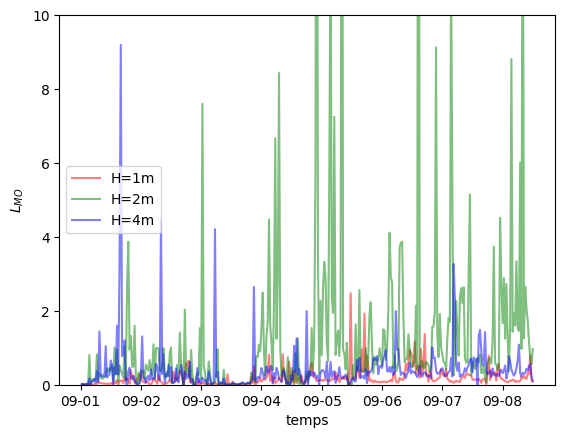

In [16]:
date_format=mpl.dates.DateFormatter("%m-%d")
#date_format=mpl.dates.DateFormatter("%H")
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2_1_30min.coords['temps'].values,T2_1_30min['zL'].values,color='r',label="H=1m",alpha=0.5)
ax.plot(T2_2_30min.coords['temps'].values,T2_2_30min['zL'].values,color='g',label="H=2m",alpha=0.5)
ax.plot(T2_3_30min.coords['temps'].values,T2_3_30min['zL'].values,color='b',label="H=4m",alpha=0.5)
ax.legend()
ax.set_xlabel("temps")
ax.set_ylabel(r"$L_{MO}$")
ax.xaxis.set_major_formatter(date_format)
ax.set_ylim(0,10)

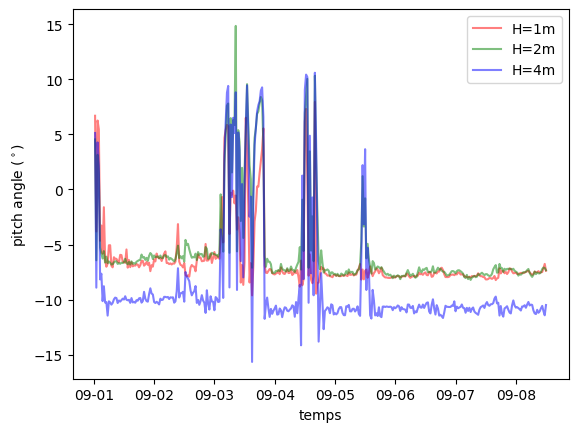

In [17]:
date_format=mpl.dates.DateFormatter("%m-%d")
#date_format=mpl.dates.DateFormatter("%H")
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2_1_30min.coords['temps'].values,T2_1_30min['pitch'].values,color='r',label="H=1m",alpha=0.5)
ax.plot(T2_2_30min.coords['temps'].values,T2_2_30min['pitch'].values,color='g',label="H=2m",alpha=0.5)
ax.plot(T2_3_30min.coords['temps'].values,T2_3_30min['pitch'].values,color='b',label="H=4m",alpha=0.5)

ax.legend()
ax.set_xlabel("temps")
ax.set_ylabel(r"pitch angle ($^\circ$)")

ax.xaxis.set_major_formatter(date_format)
plt.savefig(repertoire_figures+"T2_TO5_pitch_angle.png")

Text(0, 0.5, 'pitch angle ($^\\circ$)')

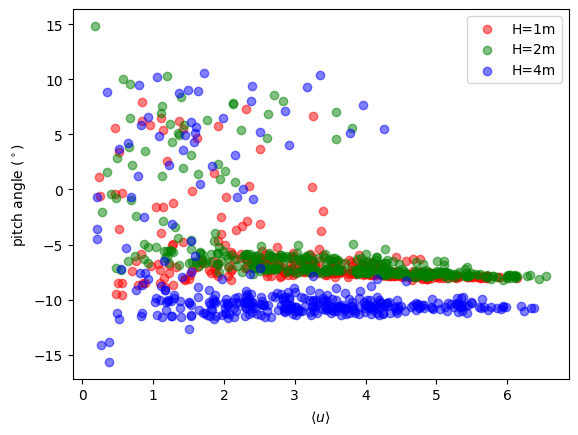

In [18]:
date_format=mpl.dates.DateFormatter("%m-%d")
#date_format=mpl.dates.DateFormatter("%H")
fig=plt.figure()
ax = fig.add_subplot(111)
ax.scatter(T2_1_30min['u_rot'].values,T2_1_30min['pitch'].values,color='r',label="H=1m",alpha=0.5)
ax.scatter(T2_2_30min['u_rot'].values,T2_2_30min['pitch'].values,color='g',label="H=2m",alpha=0.5)
ax.scatter(T2_3_30min['u_rot'].values,T2_3_30min['pitch'].values,color='b',label="H=4m",alpha=0.5)

ax.legend()
ax.set_xlabel(r"$\langle u \rangle$")
ax.set_ylabel(r"pitch angle ($^\circ$)")


(-1.0, 3.0)

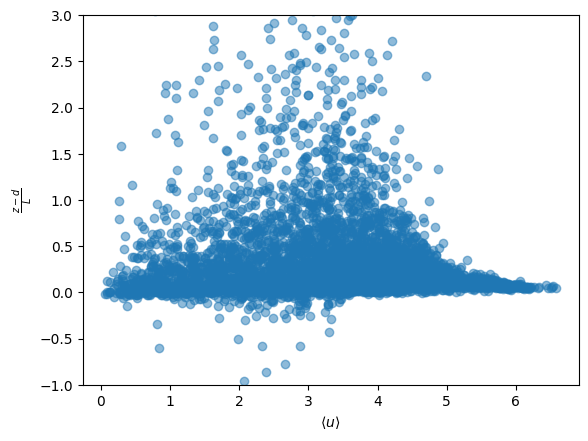

In [19]:
fig=plt.figure()
plt.scatter(T2_1_2min['u_rot'].values,T2_1_2min['zL'].values, alpha=0.5)
plt.ylabel(r"$\frac{z-d}{L}$")
plt.xlabel(r"$\langle u \rangle$")
plt.ylim(-1,3)

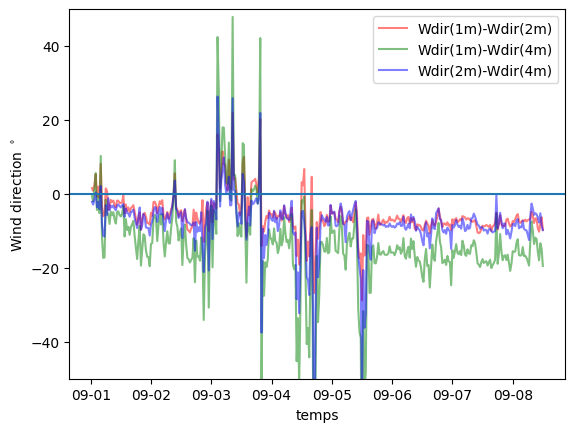

In [20]:
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2_1_30min.coords['temps'].values,T2_1_30min['wind_dir'].values-T2_2_30min['wind_dir'].values,
        color='r',label="Wdir(1m)-Wdir(2m)",alpha=0.5,)
ax.plot(T2_2_30min.coords['temps'].values,T2_1_30min['wind_dir'].values-T2_3_30min['wind_dir'].values,
        color='g',label="Wdir(1m)-Wdir(4m)",alpha=0.5)
ax.plot(T2_2_30min.coords['temps'].values,T2_2_30min['wind_dir'].values-T2_3_30min['wind_dir'].values,
        color='b',label="Wdir(2m)-Wdir(4m)",alpha=0.5)
#plt.axhline(200+30,color='r')
#plt.axhline(200-30,color='r')
ax.legend()
ax.set_xlabel("temps")
ax.set_ylabel(r"Wind direction $^\circ$")
ax.set_ylim(-50,50)
ax.axhline(0)
#plt.xlim(right=np.datetime64('2023-09-01 18:00:00'),left=np.datetime64('2023-09-02 18:00:00'))
#ax.set_ylim(200-30,200+30)
ax.xaxis.set_major_formatter(date_format)

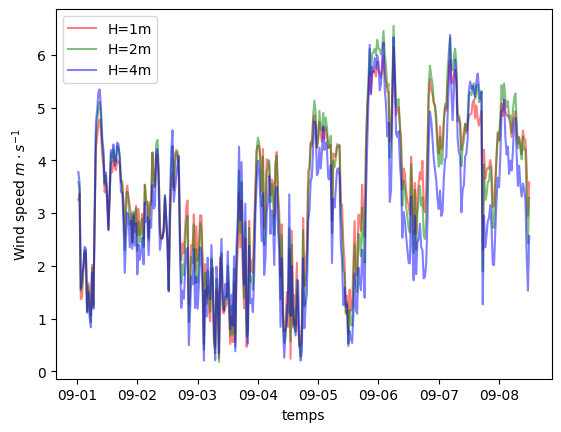

In [21]:
date_format=mpl.dates.DateFormatter("%m-%d")
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2_1_30min.coords['temps'].values,T2_1_30min['wind_speed'].values,color='r',label="H=1m",alpha=0.5)
ax.plot(T2_2_30min.coords['temps'].values,T2_2_30min['wind_speed'].values,color='g',label="H=2m",alpha=0.5)
ax.plot(T2_3_30min.coords['temps'].values,T2_3_30min['wind_speed'].values,color='b',label="H=4m",alpha=0.5)
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel("temps")
ax.set_ylabel(r"Wind speed $m\cdot s^{-1}$")
ax.legend()
plt.savefig(repertoire_figures+"WSpeed_T2_TO5.png")

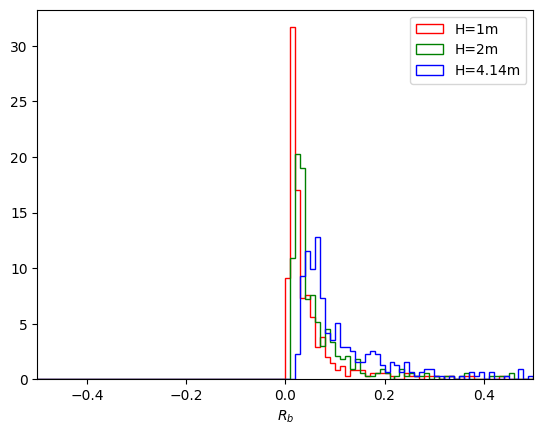

In [22]:
fig=plt.figure()

plt.hist(Ri_1_30min,color='r',histtype='step',
        label='H=1m',density=True,bins=100,range=(-0.5,0.5))

plt.hist(Ri_2_30min,color='g',histtype='step',
        label='H=2m',density=True,bins=100,range=(-0.5,0.5))

plt.hist(Ri_3_30min,color='b',histtype='step',
        label='H=4.14m',density=True,bins=100,range=(-0.5,0.5))
plt.xlabel(r"$R_b$")
plt.ylabel("
plt.xlim(-0.5,0.5)
plt.axvline(-1,linestyle='-.')
plt.axvline(1,linestyle='-.')
plt.legend()

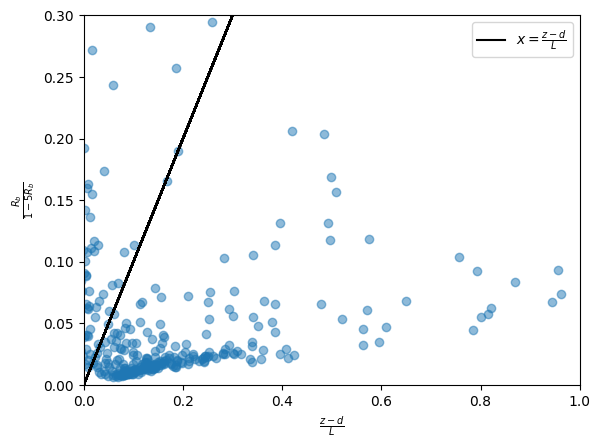

In [23]:
zL_Ri=Ri_1_30min/(1.0-5.0*Ri_1_30min)
fig=plt.figure()
plt.scatter(T2_1_30min['zL'].values,zL_Ri,alpha=0.5)
plt.plot(T2_1_30min['zL'].values,T2_1_30min['zL'].values,color='k',label=r"$x=\frac{z-d}{L}$")
plt.xlabel(r"$\frac{z-d}{L}$")
plt.ylabel(r"$\frac{R_b}{1-5R_b}$")
plt.xlim(0,1)
plt.ylim(0,0.3)
plt.legend()

(-0.1, 0.2)

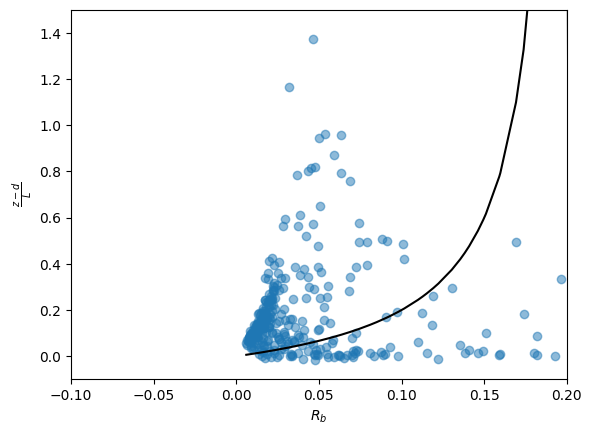

In [24]:
zL=lambda x:x/(1.0-5.0*x)
Ri_1_30min_sort=np.sort(Ri_1_30min)
fig=plt.figure()
plt.scatter(Ri_1_30min,T2_1_30min['zL'].values,alpha=0.5)
plt.plot(Ri_1_30min_sort,zL(Ri_1_30min_sort),color='k',label=r"$\frac{z}{L}=\frac{R_b}{1-5R_b}$")
plt.ylabel(r"$\frac{z-d}{L}$")
plt.xlabel(r"$R_b$")
plt.ylim(-0.1,1.5)
plt.xlim(-0.1,0.2)
#plt.legend()

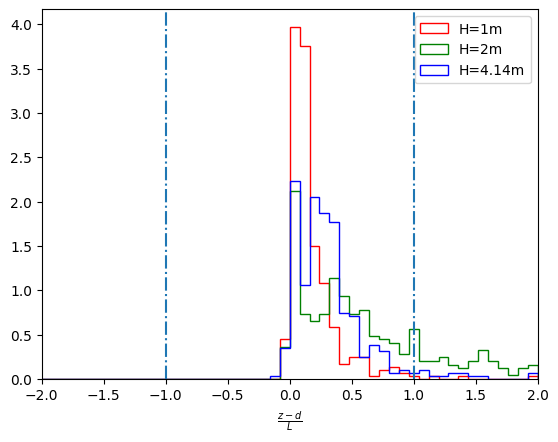

In [25]:
#Spoiler : z/L(z=2m) et z/L(z=4m) sont confondus
fig=plt.figure()

plt.hist(T2_1_30min['zL'].values,color='r',histtype='step',
        label='H=1m',density=True,bins=50,range=(-2,2))

plt.hist(T2_2_30min['zL'].values,color='g',histtype='step',
        label='H=2m',density=True,bins=50,range=(-2,2))

plt.hist(T2_3_30min['zL'].values,color='b',histtype='step',
        label='H=4.14m',density=True,bins=50,range=(-2,2))
plt.xlabel(r"$\frac{z-d}{L}$")
plt.xlim(-2,2)
plt.axvline(-1,linestyle='-.')
plt.axvline(1,linestyle='-.')
plt.legend()

In [26]:
print(T2_3_2min['wu_cov'])

<xarray.DataArray 'wu_cov' (temps: 5400)>
[5400 values with dtype=float64]
Coordinates:
  * temps    (temps) datetime64[ns] 2023-09-01T00:02:00 ... 2023-09-08T12:00:00


{'whiskers': [<matplotlib.lines.Line2D at 0x1c8b55a5310>,
 'caps': [<matplotlib.lines.Line2D at 0x1c8ba1f1b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c8b3427650>],
 'medians': [<matplotlib.lines.Line2D at 0x1c8ba1513d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c8ba33ecc0>],
 'means': []}

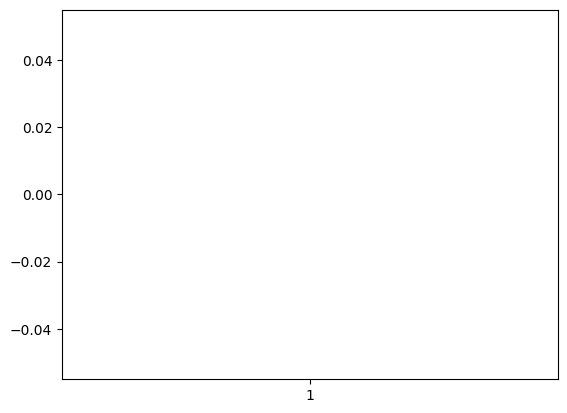

In [27]:
fig=plt.figure()
plt.boxplot(T2_1_2min['wu_cov'].values)


In [28]:
print(T2_1_2min['wu_cov'])

<xarray.DataArray 'wu_cov' (temps: 5400)>
array([ 0.003875, -0.037949, -0.095926, ..., -0.016786, -0.01612 , -0.019298])
Coordinates:
  * temps    (temps) datetime64[ns] 2023-09-01T00:02:00 ... 2023-09-08T12:00:00


(-0.5, 0.5)

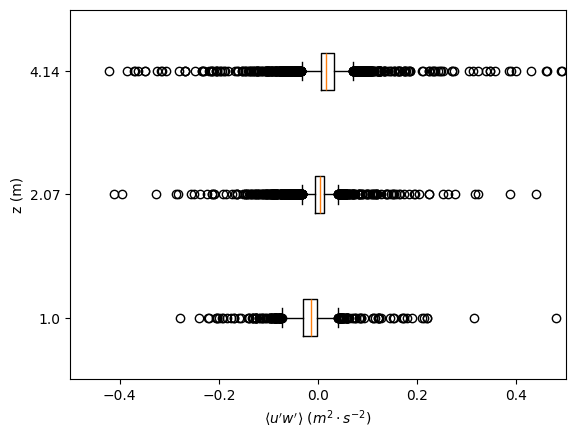

In [29]:
#diagramme en boite pour le flux de QDM à 2 minutes
fig=plt.figure()

plt.boxplot([T2_1_2min_sel['wu_cov'].values,
             T2_2_2min_sel['wu_cov'].values,
             T2_3_2min_sel['wu_cov'].values],
            vert=False, labels=[1.0,2.07,4.14],notch=False)
plt.xlabel(r"$\langle u' w'\rangle$ ($m^{2} \cdot s^{-2}$)")
plt.ylabel("z (m)")
plt.xlim(-0.5,0.5)

Text(0, 0.5, 'z (m)')

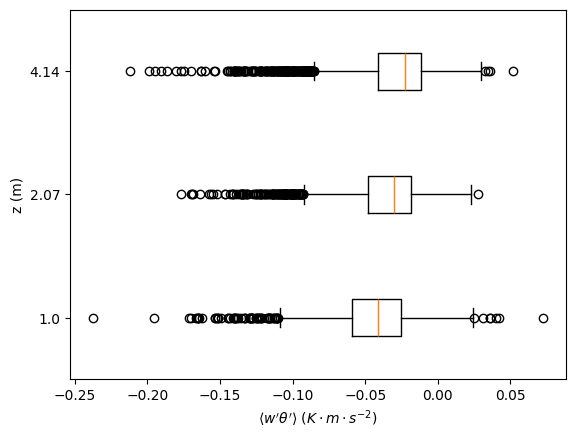

In [30]:
fig=plt.figure()

plt.boxplot([T2_1_2min_sel['wts_cov'].values,
             T2_2_2min_sel['wts_cov'].values,
             T2_3_2min_sel['wts_cov'].values],
            vert=False, labels=[1.0,2.07,4.14],notch=False)

plt.xlabel(r"$\langle w' \theta' \rangle$ ($K\cdot m\cdot s^{-2}$)")
plt.ylabel("z (m)")

In [31]:
a=np.array([np.inf,2,3,8,np.NaN])
flag_isnan=lambda x:np.isnan(x)
flag_isinf=lambda x:np.isinf(x)
flag_outliers=lambda x:np.logical_not(flag_isnan(x) | flag_isinf(x))

print(flag_isnan(a))
print(flag_isinf(a))
print(flag_outliers(a))

print(T2_1_2min['u_mean'].values)
print(T2_1_2min['u*'].values)
print(flag_outliers(T2_1_2min['u_mean']).values)
print(flag_outliers(T2_1_2min['u*']).values)
print((flag_outliers(T2_1_2min['u_mean']) & flag_outliers(T2_1_2min['u*'])).values)


[False False False False  True]
[ True False False False False]
[False  True  True  True False]
[-2.18256  -0.498563 -3.48848  ...  0.923376  1.0355    1.03062 ]
[0.194477 0.25663  0.439145 ... 0.138428 0.134793 0.152271]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]


In [32]:
def grad_z(y_surface,y_sup,delta_x):
    return (y_sup-y_surface)/(2.0*delta_x)

<xarray.Dataset>
Dimensions:                  (temps: 347)
Coordinates:
  * temps                    (temps) datetime64[ns] 2023-09-01T05:00:00 ... 2...
Data variables: (12/76)
    daytime                  (temps) float64 0.0 0.0 0.0 1.0 ... 1.0 1.0 1.0 1.0
    Tau                      (temps) float64 0.02985 -0.05058 ... 0.003558
    qc_Tau                   (temps) float64 1.0 1.0 2.0 1.0 ... 2.0 1.0 2.0 2.0
    H                        (temps) float64 -0.2524 -0.8189 ... -33.16 -42.31
    qc_H                     (temps) float64 2.0 2.0 2.0 1.0 ... 0.0 0.0 0.0 0.0
    H_strg                   (temps) float64 -0.1721 -0.2469 ... 0.05492
    ...                       ...
    v_mean.1                 (temps) float64 0.9753 2.272 1.608 ... 1.418 0.3342
    w_mean.1                 (temps) float64 -0.183 -0.3896 ... -0.3069 -0.06983
    ts_mean.1                (temps) float64 277.1 280.6 280.7 ... 284.8 286.8
    instrument_height        (temps) float64 1.03 1.03 1.03 ... 1.03 1.03 1.03

(-1.0, 5.0)

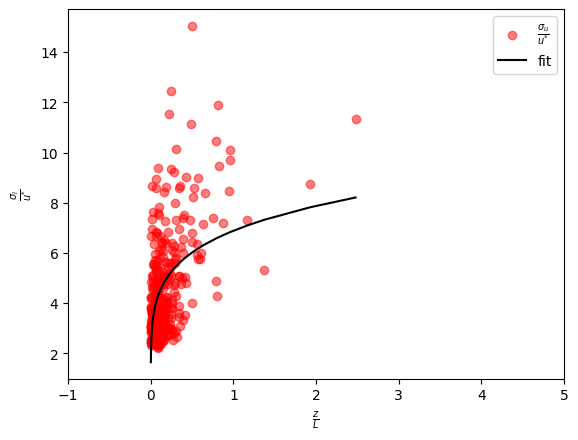

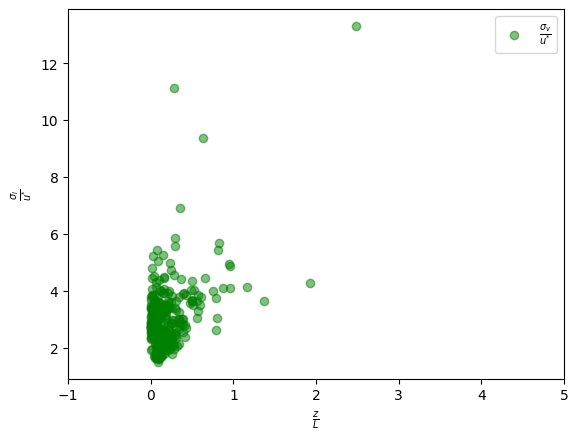

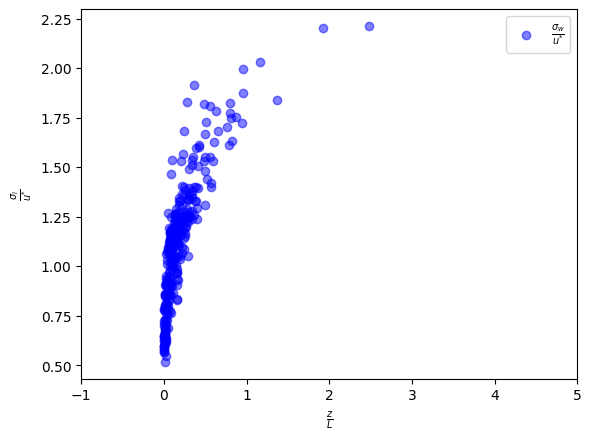

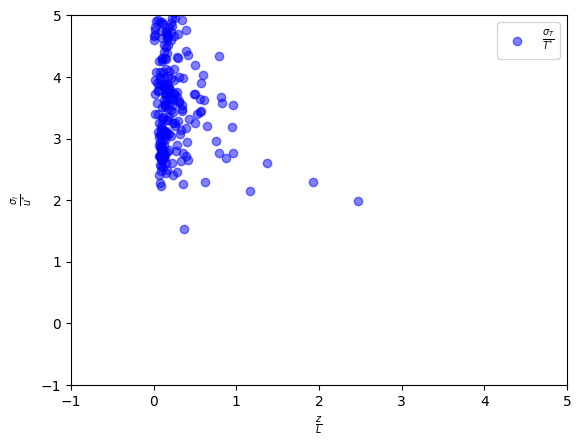

In [33]:
#graphes des rapports variances/flux en fonction de z/L)
#sur niveau le plus bas
flag_isnan=lambda x:np.isnan(x)
flag_isinf=lambda x:np.isinf(x)
flag_outliers=lambda x:np.logical_not(flag_isnan(x) | flag_isinf(x))
flag_outliers_vars= lambda x: (flag_outliers(x['u_mean']) & 
                      flag_outliers(x['v_mean']) & 
                      flag_outliers(x['u*']) &
                      flag_outliers(x['T*']) &
                      flag_outliers(x['zL']) &
                      flag_outliers(x['u_var']) &
                      flag_outliers(x['v_var']) &
                      flag_outliers(x['w_var']) &
                      flag_outliers(x['ts_var']) & 
                      flag_outliers(x['ts_mean']) &
                      flag_outliers(x['instrument_height']))
flag_all_levels = lambda x,y,z:(flag_outliers_vars(x) & flag_outliers_vars(y) & flag_outliers_vars(z))

mask_all_levels = flag_all_levels(T2_1_30min,T2_2_30min,T2_3_30min)
T2_1_zL=T2_1_30min.where(mask_all_levels,drop=True)
T2_2_zL=T2_2_30min.where(mask_all_levels,drop=True)
T2_3_zL=T2_3_30min.where(mask_all_levels,drop=True)


mask_zL_1=(T2_1_zL['zL'] > 0) & (T2_1_zL['zL'] < 10)
T2_1_zL=T2_1_zL.sortby('zL').where(mask_zL_1,drop=True)
T2_2_zL=T2_2_zL.sortby(T2_1_zL['zL']).where(mask_zL_1,drop=True)
T2_3_zL=T2_3_zL.sortby(T2_1_zL['zL']).where(mask_zL_1,drop=True)

print(T2_1_zL)
zL=T2_1_zL['zL'].values
u_s=T2_1_zL['u*'].values
t_s=T2_1_zL['T*'].values
U_moy_1=T2_1_zL['u_rot'].values
U_moy_2=T2_2_zL['u_rot'].values
U_moy_3=T2_3_zL['u_rot'].values

z_1=T2_1_zL['instrument_height'].values
z_2=T2_2_zL['instrument_height'].values
z_3=T2_3_zL['instrument_height'].values

ts_moy_1=T2_1_zL['sonic_temperature'].values
ts_moy_2=T2_2_zL['sonic_temperature'].values
ts_moy_3=T2_3_zL['sonic_temperature'].values


sigma_u=np.sqrt(T2_1_zL['u_var']).values
sigma_v=np.sqrt(T2_1_zL['v_var']).values
sigma_w=np.sqrt(T2_1_zL['w_var']).values
sigma_ts=np.sqrt(T2_1_zL['ts_var']).values

def flux_var(x,c1,c2):
    return c1*(x)**c2
def res_curve_fit(x,f,args):
    return f(x,*args)
def R_2(model,data):
    #retourne le coef. de correlation R^2
    masque= np.array(np.isnan(model) | np.isnan(data))#on enlève les NaN
    new_model=np.ma.array(model,mask=masque).compressed()
    new_data=np.ma.array(data,mask=masque).compressed()
    return scipy.stats.linregress(new_model,new_data).rvalue**2

ratio_sigma_u=sigma_u/u_s
ratio_sigma_v=sigma_v/u_s
ratio_sigma_w=sigma_w/u_s
ratio_sigma_ts=sigma_ts/u_s

res_sigma_u_fit=scipy.optimize.curve_fit(flux_var,zL,ratio_sigma_u)[0]
res_sigma_v_fit=scipy.optimize.curve_fit(flux_var,zL,ratio_sigma_v)[0]
res_sigma_w_fit=scipy.optimize.curve_fit(flux_var,zL,ratio_sigma_w)[0]
res_sigma_ts_fit=scipy.optimize.curve_fit(flux_var,zL,ratio_sigma_ts)[0]



fig=plt.figure()
plt.scatter(zL,sigma_u/u_s,color='r',label=r'$\frac{\sigma_u}{u^{*}}$',alpha=0.5)
plt.plot(zL,res_curve_fit(zL,flux_var,res_sigma_u_fit),color='k',label='fit')
plt.legend()
plt.xlabel(r"$\frac{z}{L}$")
plt.ylabel(r"$\frac{\sigma_i}{u^{*}}$")
plt.xlim(-1,5)

fig=plt.figure()
plt.scatter(zL,sigma_v/u_s,color='g',label=r'$\frac{\sigma_v}{u^{*}}$',alpha=0.5)
plt.legend()
plt.xlabel(r"$\frac{z}{L}$")
plt.ylabel(r"$\frac{\sigma_i}{u^{*}}$")
plt.xlim(-1,5)

fig=plt.figure()
plt.scatter(zL,sigma_w/u_s,color='b',label=r'$\frac{\sigma_w}{u^{*}}$',alpha=0.5)
plt.legend()
plt.xlabel(r"$\frac{z}{L}$")
plt.ylabel(r"$\frac{\sigma_i}{u^{*}}$")
plt.xlim(-1,5)

fig=plt.figure()
plt.scatter(zL,sigma_ts/t_s,color='b',label=r'$\frac{\sigma_T}{T^{*}}$',alpha=0.5)
plt.legend()
plt.xlabel(r"$\frac{z}{L}$")
plt.ylabel(r"$\frac{\sigma_i}{u^{*}}$")
plt.xlim(-1,5)
plt.ylim(-1,5)

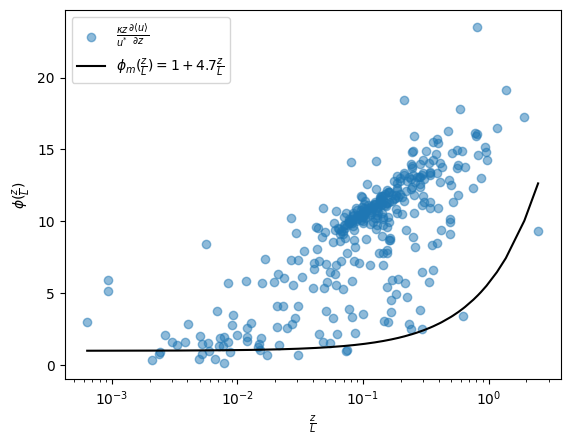

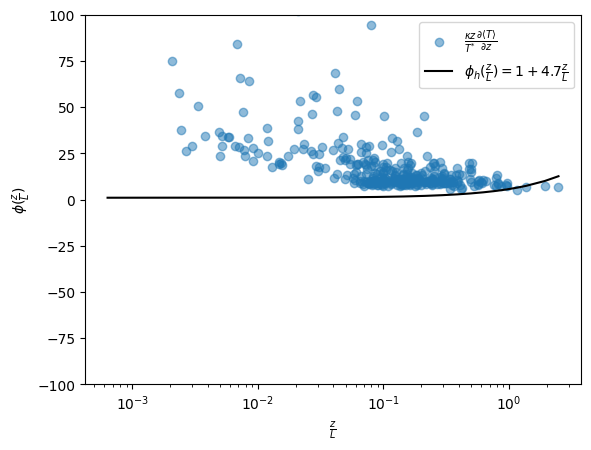

In [34]:
#relations flux-gradient
#on prend des relations dlf phi(z/L)=a(z/L)+b (z/L >0)
#pour le niveau 1 (ça vaut le coup de le faire pour les autres).
#on utilise un schéma d'ordre 1 entre les deux premiers niveaux (comme dans Nadeau 2013)
def phi(zSL,a,b):
    return a*zSL+b

#print(f"z_1 {z_1}")
def derivee_avant(y_sup,y,delta_x):
    return(y_sup - y)/delta_x
kappa=0.41#constante de Prandtl
delta_z=z_1
dU_dz=U_moy_1/delta_z
dT_dz=(ts_moy_1-273.15)/delta_z

flux_grad_U=(kappa*delta_z/u_s)*dU_dz
flux_grad_T=(kappa*delta_z/t_s)*dT_dz
beta=4.7
alpha=1.0
phi_m=phi(zL,beta,alpha)
phi_h=phi(zL,beta,alpha)
fig=plt.figure()
plt.scatter(zL,flux_grad_U,alpha=0.5,
            label=r'$\frac{\kappa z}{u^{*}}\frac{\partial \langle u \rangle}{\partial z}$')
plt.plot(zL,phi_m,label=r'$\phi_m (\frac{z}{L})=1+4.7\frac{z}{L}$',color='k')
#plt.xlim(0,10)
plt.xlabel(r"$\frac{z}{L}$")
plt.ylabel(r"$\phi(\frac{z}{L})$")
#plt.ylim(-3,10)
plt.xscale('log')
plt.legend()
#plt.text(1,1,r"$R^2$ {}".format(npR_2(phi_m,flux_grad_U)))
#plt.xlim(right=0.2)
plt.savefig(repertoire_figures+"Flux_grad_U_T2.png")

fig=plt.figure()
plt.xscale('log')
plt.scatter(zL,flux_grad_T,alpha=0.5,
            label=r'$\frac{\kappa z}{T^{*}}\frac{\partial \langle T \rangle}{\partial z}$')
plt.plot(zL,phi_h,label=r'$\phi_h (\frac{z}{L})=1+4.7\frac{z}{L}$',color='k')
#plt.xlim(0.00001,10)
plt.xlabel(r"$\frac{z}{L}$")
plt.ylabel(r"$\phi(\frac{z}{L})$")
#plt.text(1,1,r"$R^2$ {}".format(R_2(phi_h,flux_grad_T)))
plt.ylim(-100,100)
plt.legend()
plt.savefig(repertoire_figures+"Flux_grad_T_T2.png")
#plt.xlim(right=0.2)
#print(f"accord avec le modele {R_2(phi(zL,4.7,1),flux_grad_T)}")
#print(t_s)

In [35]:
print(zL,phi_m)

[6.35858e-04 9.24585e-04 9.35575e-04 2.08231e-03 2.35490e-03 2.42772e-03
 2.66990e-03 3.00586e-03 3.31774e-03 3.79024e-03 4.04825e-03 4.92638e-03
 5.00086e-03 5.18392e-03 5.22705e-03 5.65138e-03 5.81281e-03 5.91743e-03
 6.56725e-03 6.88274e-03 7.12113e-03 7.27445e-03 7.60285e-03 7.76248e-03
 7.86252e-03 8.33587e-03 8.43435e-03 8.72372e-03 9.10704e-03 9.21901e-03
 9.95876e-03 1.16229e-02 1.18857e-02 1.18875e-02 1.19812e-02 1.29085e-02
 1.46343e-02 1.48499e-02 1.51517e-02 1.55311e-02 1.57970e-02 1.64177e-02
 1.72390e-02 1.94377e-02 2.07648e-02 2.07709e-02 2.09596e-02 2.15310e-02
 2.28628e-02 2.33321e-02 2.48837e-02 2.65229e-02 2.68014e-02 2.72810e-02
 2.77072e-02 2.88746e-02 2.92547e-02 3.03322e-02 3.05421e-02 3.05753e-02
 3.26031e-02 3.39598e-02 3.96589e-02 4.04411e-02 4.09114e-02 4.25907e-02
 4.26310e-02 4.34461e-02 4.42065e-02 4.47594e-02 4.71892e-02 4.77229e-02
 4.79698e-02 4.91219e-02 4.94544e-02 5.03430e-02 5.11508e-02 5.19310e-02
 5.42379e-02 5.43622e-02 5.73653e-02 5.78195e-02 5.

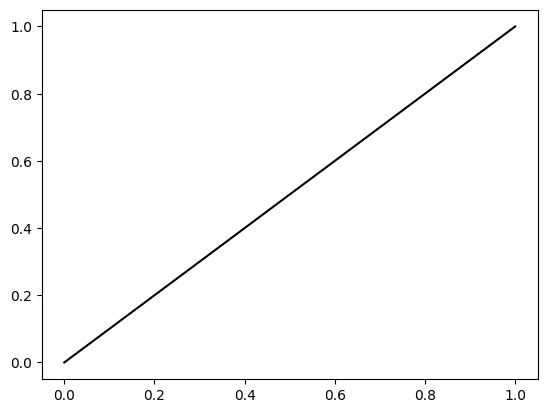

In [36]:
def slope_1(x,axis=None,**kwargs):
    x_range=np.linspace(np.nanmin(x),np.nanmax(x),x.size)
    if isinstance(x,mpl.axes.Axes):
        axis.plot(x_range,x_range,**kwargs)
    else:
        plt.plot(x_range,x_range,**kwargs)
y=np.linspace(0,1)
fig=plt.figure()
#plt.plot(y,y)
slope_1(y,color='k')

appel wT
zt 0.0001
appel u_s()
z0 0.001
appel wT
zt 0.0001
appel u_s()
z0 0.001
appel wT
zt 0.0001
appel u_s()
z0 0.001
appel u_s()
z0 0.001
appel u_s()
z0 0.001
appel u_s()
z0 0.001


Text(0, 0.5, '$u^*$ bulk')

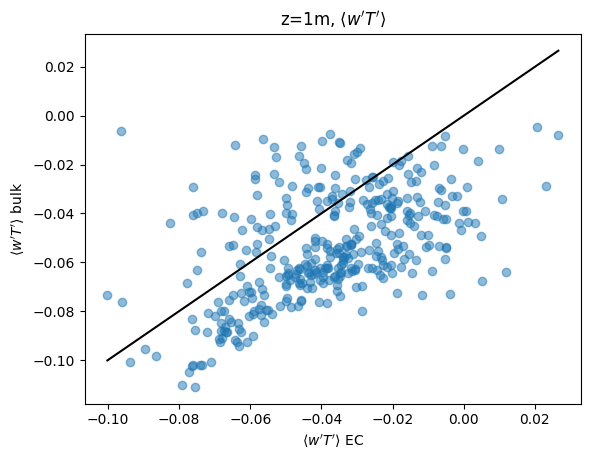

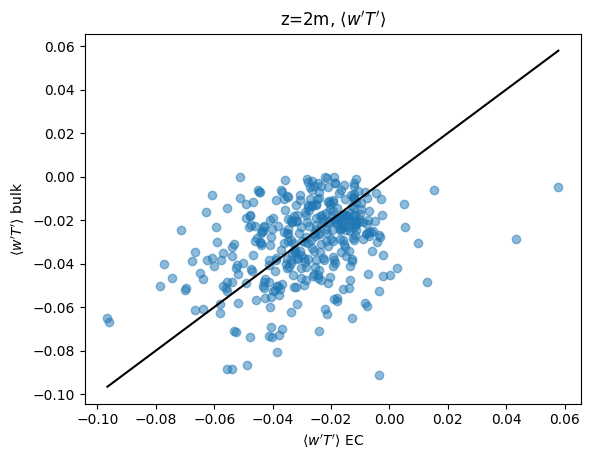

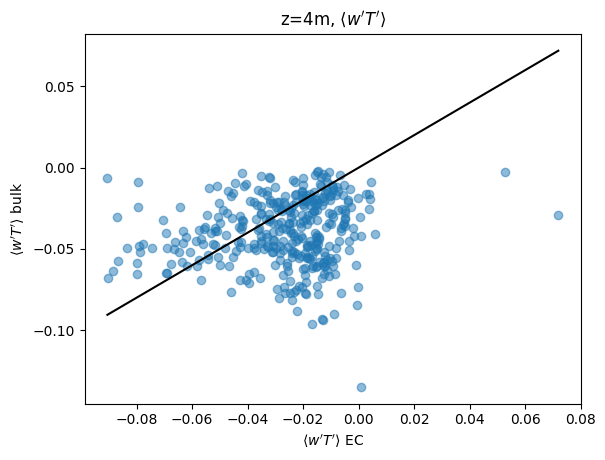

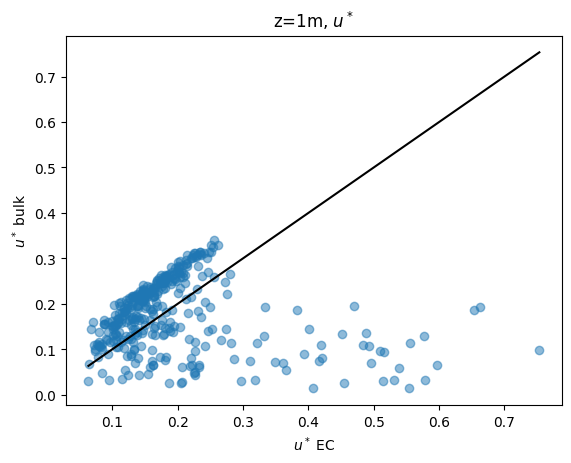

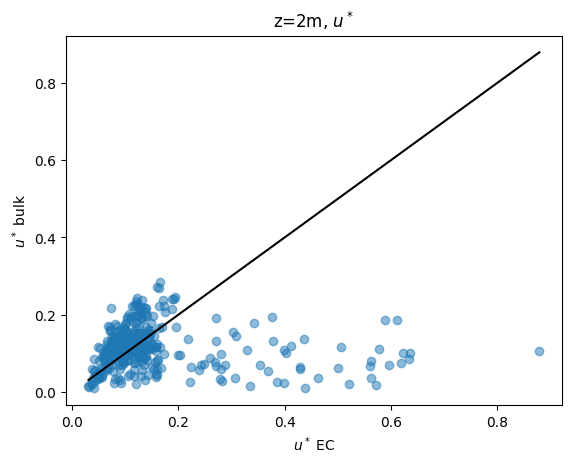

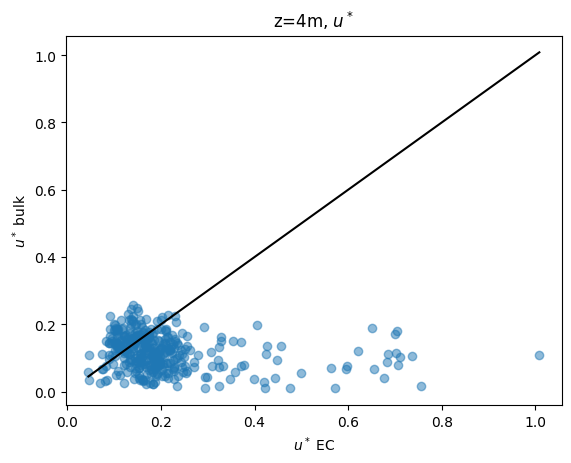

In [37]:
import Bulk

z_0=0.001#m
z_t=z_q=1.0e-1*z_0
H_bulk_1=Bulk.wT_bulk(T2_1_30min,z0=z_0,zt=z_t).values
H_bulk_2=Bulk.wT_bulk(T2_2_30min,z0=z_0,zt=z_t).values
H_bulk_3=Bulk.wT_bulk(T2_3_30min,z0=z_0,zt=z_t).values

us_bulk_1=Bulk.us_bulk(T2_1_30min,z0=z_0).values
us_bulk_2=Bulk.us_bulk(T2_2_30min,z0=z_0).values
us_bulk_3=Bulk.us_bulk(T2_3_30min,z0=z_0).values


fig=plt.figure()
plt.title(r"z=1m, $\langle w'T' \rangle$")
plt.scatter(T2_1_30min['wts_cov'].values,H_bulk_1,alpha=0.5)
slope_1(T2_1_30min['wts_cov'].values,color='k')
plt.xlabel(r"$\langle w'T' \rangle$ EC")
plt.ylabel(r"$\langle w'T' \rangle$ bulk")

fig=plt.figure()
plt.title(r"z=2m, $\langle w'T' \rangle$")
plt.scatter(T2_2_30min['wts_cov'].values,H_bulk_2,alpha=0.5)
slope_1(T2_2_30min['wts_cov'].values,color='k')
plt.xlabel(r"$\langle w'T' \rangle$ EC")
plt.ylabel(r"$\langle w'T' \rangle$ bulk")

fig=plt.figure()
plt.title(r"z=4m, $\langle w'T' \rangle$")
plt.scatter(T2_3_30min['wts_cov'].values,H_bulk_3,alpha=0.5)
slope_1(T2_3_30min['wts_cov'].values,color='k')
plt.xlabel(r"$\langle w'T' \rangle$ EC")
plt.ylabel(r"$\langle w'T' \rangle$ bulk")


fig=plt.figure()
plt.title(r"z=1m, $u^*$")
plt.scatter(T2_1_30min['u*'].values,us_bulk_1,alpha=0.5)
slope_1(T2_1_30min['u*'].values,color='k')
plt.xlabel(r"$u^*$ EC")
plt.ylabel(r"$u^*$ bulk")

fig=plt.figure()
plt.title(r"z=2m, $u^*$")
plt.scatter(T2_2_30min['u*'].values,us_bulk_2,alpha=0.5)
slope_1(T2_2_30min['u*'].values,color='k')
plt.xlabel(r"$u^*$ EC")
plt.ylabel(r"$u^*$ bulk")

fig=plt.figure()
plt.title(r"z=4m, $u^*$")
plt.scatter(T2_3_30min['u*'].values,us_bulk_3,alpha=0.5)
slope_1(T2_3_30min['u*'].values,color='k')
plt.xlabel(r"$u^*$ EC")
plt.ylabel(r"$u^*$ bulk")


R2 H niveau 1 0.831
R2 H niveau 2 0.744
R2 H niveau 3 0.71


Text(0.2, 0.1, '$R^2$ = 0.977')

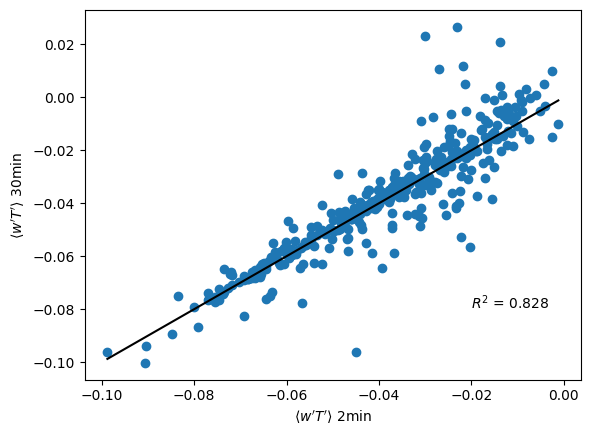

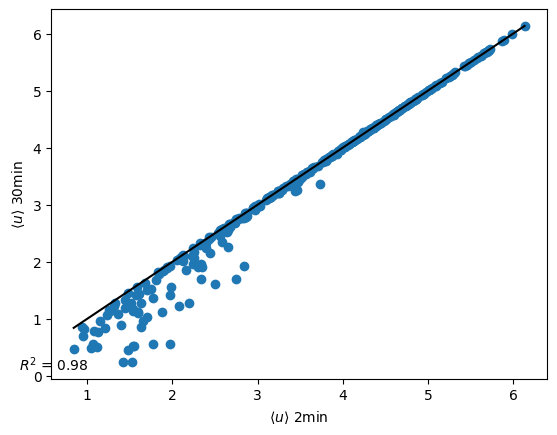

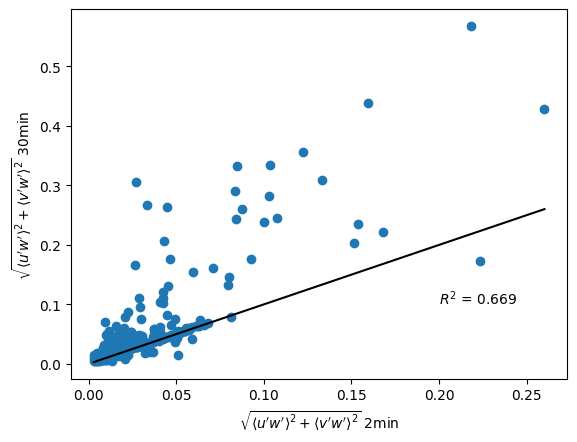

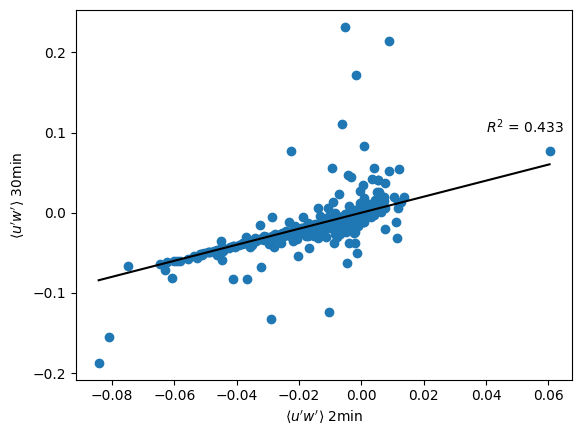

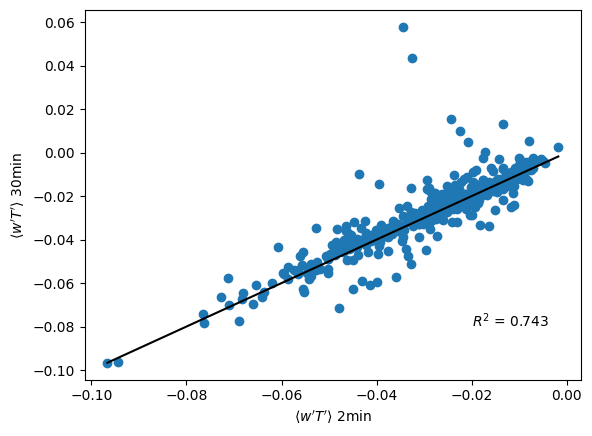

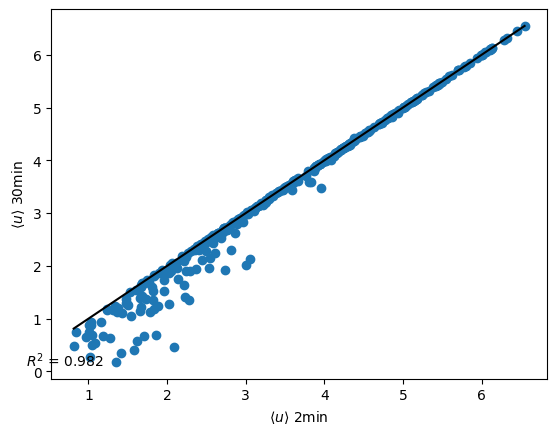

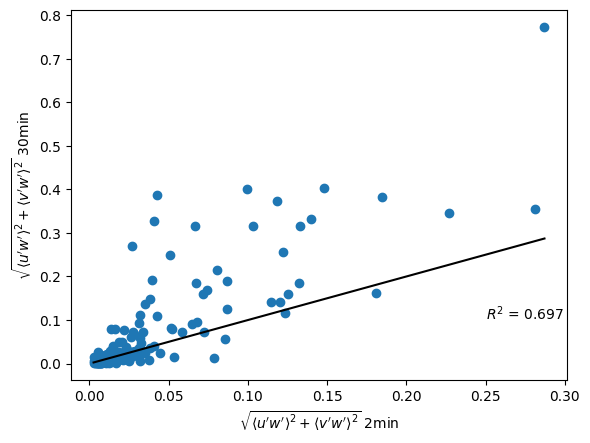

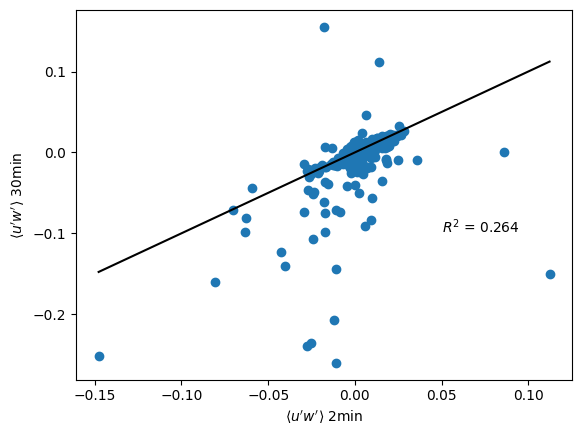

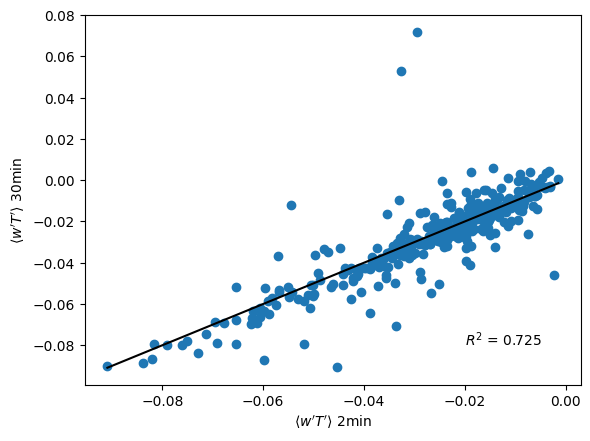

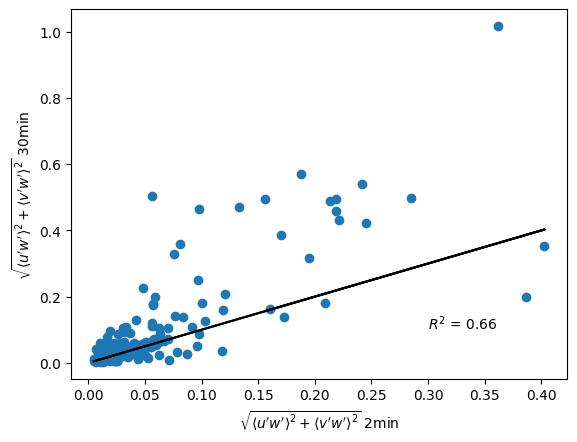

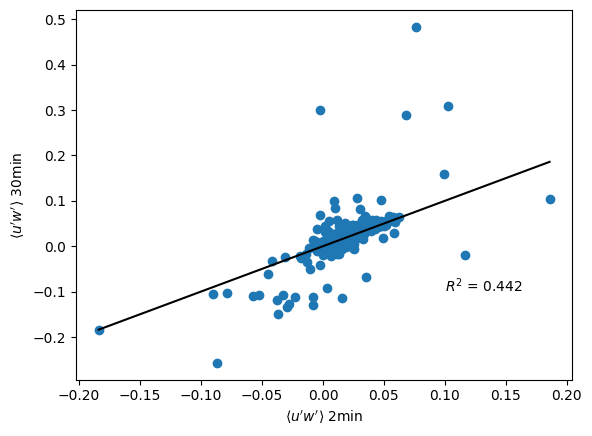

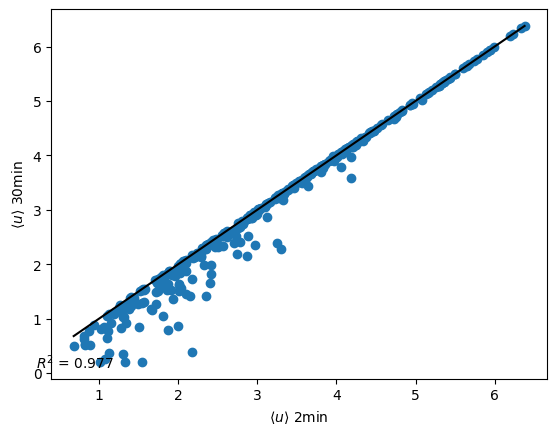

In [38]:
T2_1_2min_moy=T2_1_2min.coarsen(temps=15,side='left').mean()
T2_2_2min_moy=T2_2_2min.coarsen(temps=15,side='left').mean()
T2_3_2min_moy=T2_3_2min.coarsen(temps=15,side='left').mean()

x=np.linspace(-0.09,0.0)
fig=plt.figure()
#plt.title("niveau 1 : H")
plt.scatter(T2_1_2min_moy['wts_cov'].values,T2_1_30min['wts_cov'].values)
plt.xlabel(r"$\langle w'T'\rangle$ 2min")
plt.ylabel(r"$\langle w'T'\rangle$ 30min")
slope_1(T2_1_2min_moy['wts_cov'].values,color='k')
plt.text(-0.02,-0.08,r"$R^2$ = {}".format(np.around(R_2(T2_1_2min_moy['wts_cov'].values,T2_1_30min['wts_cov'].values),3)))
plt.savefig(repertoire_figures+"T2_TO5_1_wT_30min_vs_2min.png")

print(f"R2 H niveau 1 {np.around(R_2(T2_1_2min_moy['H'].values,T2_1_30min['H'].values),3)}")
print(f"R2 H niveau 2 {np.around(R_2(T2_2_2min_moy['H'].values,T2_2_30min['H'].values),3)}")
print(f"R2 H niveau 3 {np.around(R_2(T2_3_2min_moy['H'].values,T2_3_30min['H'].values),3)}")

fig=plt.figure()
x=np.linspace(0.2,0.2)
#plt.title(r"niveau 1 : u")
plt.scatter(T2_1_2min_moy['u_rot'].values,T2_1_30min['u_rot'].values)
#plt.plot(T2_1_2min_moy['u*'].values**2,T2_1_2min_moy['u*'].values**2,color='k')
slope_1(T2_1_2min_moy['u_rot'].values,color='k')
plt.xlabel(r"$\langle u\rangle$ 2min")
plt.ylabel(r"$\langle u\rangle$ 30min")
plt.text(0.2,0.1,r"$R^2$ = {}".format(np.around(R_2(T2_1_2min_moy['u_rot'].values,T2_1_30min['u_rot'].values),3)))
#plt.savefig(repertoire_figures+"T2_TO5_1_Tau_30min_vs_2min.png")

fig=plt.figure()
x=np.linspace(0.2,0.2)
#plt.title(r"niveau 1 : u*")
plt.scatter(T2_1_2min_moy['u*'].values**2,T2_1_30min['u*'].values**2)
#plt.plot(T2_1_2min_moy['u*'].values**2,T2_1_2min_moy['u*'].values**2,color='k')
slope_1(T2_1_2min_moy['u*'].values**2,color='k')
plt.xlabel(r"$\sqrt{{\langle u'w'\rangle}^2+{\langle v'w'\rangle}^2}$ 2min")
plt.ylabel(r"$\sqrt{{\langle u'w'\rangle}^2+{\langle v'w'\rangle}^2}$ 30min")
plt.text(0.2,0.1,r"$R^2$ = {}".format(np.around(R_2(T2_1_2min_moy['u*'].values**2,T2_1_30min['u*'].values**2),3)))
plt.savefig(repertoire_figures+"T2_TO5_1_Tau_30min_vs_2min.png")

fig=plt.figure()
#plt.title(r"niveau 1 : $\langle u'w' \rangle$")
plt.scatter(T2_1_2min_moy['wu_cov'].values,T2_1_30min['wu_cov'].values)
#plt.plot(T2_1_2min_moy['wu_cov'].values,T2_1_2min_moy['wu_cov'].values,color='k')
slope_1(T2_1_2min_moy['wu_cov'].values,color='k')
plt.xlabel(r"$\langle u'w'\rangle$ 2min")
plt.ylabel(r"$\langle u'w'\rangle$ 30min")
plt.text(0.04,0.1,r"$R^2$ = {}".format(np.around(R_2(T2_1_2min_moy['wu_cov'].values,T2_1_30min['wu_cov'].values),3)))
plt.savefig(repertoire_figures+"T2_TO5_1_uw_30min_vs_2min.png")

x=np.linspace(-0.09,0.0)
fig=plt.figure()
#plt.title("niveau 2 : H")
plt.scatter(T2_2_2min_moy['wts_cov'].values,T2_2_30min['wts_cov'].values)
plt.xlabel(r"$\langle w'T'\rangle$ 2min")
plt.ylabel(r"$\langle w'T'\rangle$ 30min")
#plt.plot(T2_2_2min_moy['wts_cov'].values,T2_2_2min_moy['wts_cov'].values,color='k')
slope_1(T2_2_2min_moy['wts_cov'].values,color='k')
plt.text(-0.02,-0.08,r"$R^2$ = {}".format(np.around(R_2(T2_2_2min_moy['wts_cov'].values,T2_2_30min['wts_cov'].values),3)))
plt.savefig(repertoire_figures+"T2_TO5_2_wT_30min_vs_2min.png")
fig=plt.figure()
x=np.linspace(0.2,0.2)
#plt.title(r"niveau 1 : u")
plt.scatter(T2_2_2min_moy['u_rot'].values,T2_2_30min['u_rot'].values)
#plt.plot(T2_1_2min_moy['u*'].values**2,T2_1_2min_moy['u*'].values**2,color='k')
slope_1(T2_2_2min_moy['u_rot'].values,color='k')
plt.xlabel(r"$\langle u\rangle$ 2min")
plt.ylabel(r"$\langle u\rangle$ 30min")
plt.text(0.2,0.1,r"$R^2$ = {}".format(np.around(R_2(T2_2_2min_moy['u_rot'].values,T2_2_30min['u_rot'].values),3)))

fig=plt.figure()
x=np.linspace(-0.0,0.5)
#plt.title("niveau 2 : u*")
plt.scatter(T2_2_2min_moy['u*'].values**2,T2_2_30min['u*'].values**2)
#plt.plot(T2_2_2min_moy['u*'].values**2,T2_2_2min_moy['u*'].values**2,color='k')
slope_1(T2_2_2min_moy['u*'].values**2,color='k')
plt.xlabel(r"$\sqrt{{\langle u'w'\rangle}^2+{\langle v'w'\rangle}^2}$ 2min")
plt.ylabel(r"$\sqrt{{\langle u'w'\rangle}^2+{\langle v'w'\rangle}^2}$ 30min")
plt.text(0.25,0.1,r"$R^2$ = {}".format(np.around(R_2(T2_1_2min_moy['u*'].values,T2_1_30min['u*'].values),3)))
plt.savefig(repertoire_figures+"T2_TO5_2_Tau_30min_vs_2min.png")

fig=plt.figure()
#plt.title(r"niveau 2 : $\langle u'w' \rangle$")
plt.scatter(T2_2_2min_moy['wu_cov'].values,T2_2_30min['wu_cov'].values)
#plt.plot(T2_2_2min_moy['wu_cov'].values,T2_2_2min_moy['wu_cov'].values,color='k')
slope_1(T2_2_2min_moy['wu_cov'].values,color='k')
plt.xlabel(r"$\langle u'w'\rangle$ 2min")
plt.ylabel(r"$\langle u'w'\rangle$ 30min")
plt.text(0.05,-0.1,r"$R^2$ = {}".format(np.around(R_2(T2_2_2min_moy['wu_cov'].values,T2_2_30min['wu_cov'].values),3)))
plt.savefig(repertoire_figures+"T2_TO5_2_uw_30min_vs_2min.png")

x=np.linspace(-0.09,0.0)
fig=plt.figure()
#plt.title("niveau 3 : H")
plt.scatter(T2_3_2min_moy['wts_cov'].values,T2_3_30min['wts_cov'].values)
plt.xlabel(r"$\langle w'T'\rangle$ 2min")
plt.ylabel(r"$\langle w'T'\rangle$ 30min")
#plt.plot(T2_3_2min_moy['wts_cov'].values,T2_3_2min_moy['wts_cov'].values,color='k')
slope_1(T2_3_2min_moy['wts_cov'].values,color='k')
plt.text(-0.02,-0.08,r"$R^2$ = {}".format(np.around(R_2(T2_3_2min_moy['wts_cov'].values,T2_3_30min['wts_cov'].values),3)))
plt.savefig(repertoire_figures+"T2_TO5_3_wT_30min_vs_2min.png")


fig=plt.figure()
x=np.linspace(-0.0,0.5)
#plt.title("niveau 3 : u*")
plt.scatter(T2_3_2min_moy['u*'].values**2,T2_3_30min['u*'].values**2)
plt.plot(T2_3_2min_moy['u*'].values**2,T2_3_2min_moy['u*'].values**2,color='k')
plt.xlabel(r"$\sqrt{{\langle u'w'\rangle}^2+{\langle v'w'\rangle}^2}$ 2min")
plt.ylabel(r"$\sqrt{{\langle u'w'\rangle}^2+{\langle v'w'\rangle}^2}$ 30min")
slope_1(T2_3_2min_moy['u*'].values**2,color='k')
plt.text(0.3,0.1,r"$R^2$ = {}".format(np.around(R_2(T2_3_2min_moy['u*'].values**2,T2_3_30min['u*'].values**2),3)))
plt.savefig(repertoire_figures+"T2_TO5_3_Tau_30min_vs_2min.png")

fig=plt.figure()
#plt.title(r"niveau 3 : $\langle u'w' \rangle$")
plt.scatter(T2_3_2min_moy['wu_cov'].values,T2_3_30min['wu_cov'].values)
#plt.plot(T2_3_2min_moy['wu_cov'].values**2,T2_3_2min_moy['wu_cov'].values**2,color='k')
slope_1(T2_3_2min_moy['wu_cov'].values,color='k')
plt.xlabel(r"$\langle u'w'\rangle$ 2min")
plt.ylabel(r"$\langle u'w'\rangle$ 30min")
plt.text(0.1,-0.1,r"$R^2$ = {}".format(np.around(R_2(T2_3_2min_moy['wu_cov'].values,T2_3_30min['wu_cov'].values),3)))
plt.savefig(repertoire_figures+"T2_TO5_3_uw_30min_vs_2min.png")

fig=plt.figure()
x=np.linspace(0.2,0.2)
#plt.title(r"niveau 1 : u")
plt.scatter(T2_3_2min_moy['u_rot'].values,T2_3_30min['u_rot'].values)
#plt.plot(T2_1_2min_moy['u*'].values**2,T2_1_2min_moy['u*'].values**2,color='k')
slope_1(T2_3_2min_moy['u_rot'].values,color='k')
plt.xlabel(r"$\langle u\rangle$ 2min")
plt.ylabel(r"$\langle u\rangle$ 30min")
plt.text(0.2,0.1,r"$R^2$ = {}".format(np.around(R_2(T2_3_2min_moy['u_rot'].values,T2_3_30min['u_rot'].values),3)))

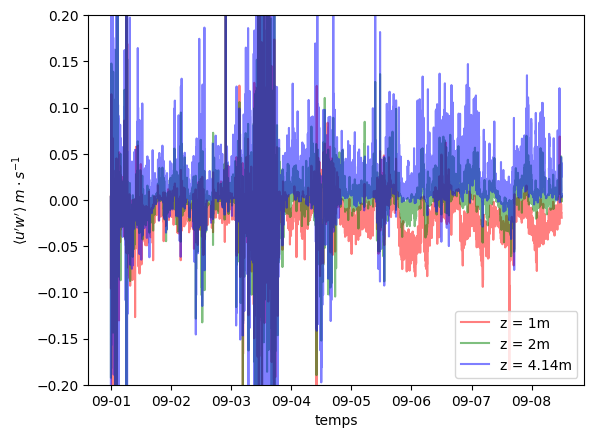

In [39]:
date_format=mpl.dates.DateFormatter("%m-%d")
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(T2_1_2min.coords['temps'].values,T2_1_2min['wu_cov'].values,
         color='r',label='z = 1m',alpha=0.5)
ax.plot(T2_2_2min.coords['temps'].values,T2_2_2min['wu_cov'].values,
         color='g',label='z = 2m',alpha=0.5)
ax.plot(T2_3_2min.coords['temps'].values,T2_3_2min['wu_cov'].values,
         color='b',label='z = 4.14m',alpha=0.5)
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel("temps")
ax.set_ylabel(r"$\langle u'w' \rangle$ $m\cdot s^{-1}$")
ax.set_ylim(-0.2,0.2)
ax.legend()

In [40]:
#affichage des ogives et des spectres en fonction de Ri
#Au préalable, on ne sélectionne que ceux ayant passé le contrôle qualité
def plot_MRD_bins(Ds_binned, var,axis,**kwargs):
    for groups in Ds_binned.groups:
        Ds_i=Ds_binned[groups]
        Ds_moy=Ds_i[var].mean(axis).values
        Ds_std=Ds_i[var].std(axis).values
        """
        plt.errorbar(Ds_i.coords['temps'].values,
                     Ds_moy,yerr=Ds_std,label=axis+'=('+str(groups.left)+','+str(groups.right)+')',**kwargs)"""
        plt.plot(Ds_i.coords['temps'].values,Ds_moy,label=axis+'=('+str(groups.left)+','+str(groups.right)+')')
        #                                                              type pandas.interval
        plt.fill_between(Ds_i.coords['temps'].values,Ds_moy-Ds_std,Ds_moy+Ds_std,alpha=0.2)


In [41]:
arr = xr.DataArray(

    data=np.ones((2, 3)),

    dims=["x", "y"],

    coords={"x": range(2), "y": range(3), "a": ("x", [3, 4])},

)
print(arr)
ds = xr.Dataset({"v": arr})

print(ds)

print(ds.set_index(x="a").rename({'x':'a'}))

<xarray.DataArray (x: 2, y: 3)>
array([[1., 1., 1.],
       [1., 1., 1.]])
Coordinates:
  * x        (x) int32 0 1
  * y        (y) int32 0 1 2
    a        (x) int32 3 4
<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int32 0 1
  * y        (y) int32 0 1 2
    a        (x) int32 3 4
Data variables:
    v        (x, y) float64 1.0 1.0 1.0 1.0 1.0 1.0
<xarray.Dataset>
Dimensions:  (a: 2, y: 3)
Coordinates:
  * a        (a) int32 3 4
  * y        (y) int32 0 1 2
Data variables:
    v        (a, y) float64 1.0 1.0 1.0 1.0 1.0 1.0


In [42]:
print(np.interp(4,[0,5],[0,5]))

4.0


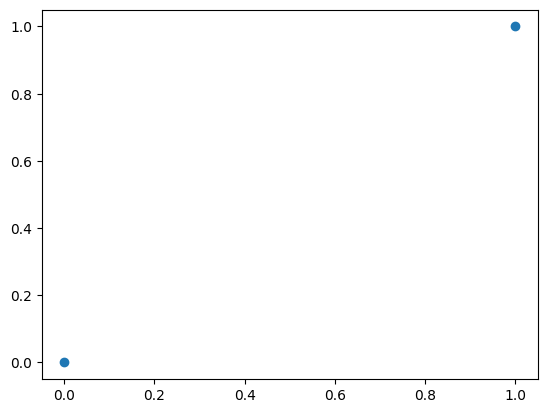

In [43]:
plt.scatter([0,1,np.NaN],[0,1,2])

In [44]:
print(T2_1_2min.sel(temps=[np.datetime64("2023-09-07 01:00:00"),
                            np.datetime64("2023-09-08 01:00:00")]))

<xarray.Dataset>
Dimensions:                  (temps: 2)
Coordinates:
  * temps                    (temps) datetime64[ns] 2023-09-07T01:00:00 2023-...
Data variables: (12/76)
    daytime                  (temps) float64 0.0 0.0
    Tau                      (temps) float64 -0.02112 -0.03344
    qc_Tau                   (temps) float64 0.0 0.0
    H                        (temps) float64 -44.9 -46.09
    qc_H                     (temps) float64 0.0 0.0
    H_strg                   (temps) float64 -3.066 -1.685
    ...                       ...
    v_mean.1                 (temps) float64 3.977 4.815
    w_mean.1                 (temps) float64 -0.7649 -0.9342
    ts_mean.1                (temps) float64 284.0 283.3
    instrument_height        (temps) float64 1.03 1.03
    wu_cov                   (temps) float64 -0.02176 -0.03385
    vw_cov                   (temps) float64 0.008114 0.01467


In [45]:
#on va voir si les flux sont constants avec la hauteur !
#on prend pour référence <w'T'> à 1m, et on vérifie si c'est pareil
#pour les autres niveaux (à 10% près !)
#Spoiler NON !
var_ref='wu_cov'
flux_ref=T2_1_2min[var_ref]
flag_flux_const_level=lambda x,ref:(x>=0.9*ref)&(x<=1.1*ref)
masque_flux_const=flag_flux_const_level(T2_2_2min[var_ref],flux_ref)|flag_flux_const_level(T2_3_2min[var_ref],flux_ref)

T2_1_flux_const=T2_1_2min.where(masque_flux_const,drop=True)
T2_2_flux_const=T2_2_2min.where(masque_flux_const,drop=True)
T2_3_flux_const=T2_3_2min.where(masque_flux_const,drop=True)

print(T2_1_flux_const)
print(T2_2_flux_const)
print(T2_1_flux_const.coords['temps'].values)



<xarray.Dataset>
Dimensions:                  (temps: 74)
Coordinates:
  * temps                    (temps) datetime64[ns] 2023-09-01T01:36:00 ... 2...
Data variables: (12/76)
    daytime                  (temps) float64 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    Tau                      (temps) float64 0.02286 0.02777 ... 0.0201 0.004438
    qc_Tau                   (temps) float64 1.0 1.0 1.0 2.0 ... 0.0 1.0 0.0 2.0
    H                        (temps) float64 -21.28 -15.97 ... -68.96 -11.4
    qc_H                     (temps) float64 0.0 1.0 1.0 0.0 ... 0.0 1.0 0.0 1.0
    H_strg                   (temps) float64 2.012 1.003 6.583 ... 22.86 14.97
    ...                       ...
    v_mean.1                 (temps) float64 -0.3749 0.3287 ... 0.7899 1.55
    w_mean.1                 (temps) float64 -0.0928 -0.01377 ... -0.3575
    ts_mean.1                (temps) float64 278.1 277.5 278.6 ... 288.3 288.6
    instrument_height        (temps) float64 1.03 1.03 1.03 ... 1.03 1.03 1.03
   

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


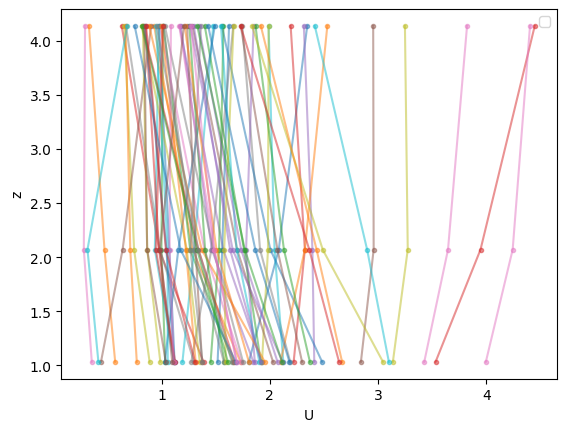

In [46]:
fig=plt.figure()
for i in range(0,T2_1_flux_const.coords['temps'].size):
    #U_i_1=np.sqrt(T2_1_K_trunc['u_mean'].values[i]**2+T2_1_K_trunc['v_mean'].values[i]**2)
    U_i_1=T2_1_flux_const['u_rot'].values[i]
    #U_i_2=np.sqrt(T2_2_K_trunc['u_mean'].values[i]**2+T2_2_K_trunc['v_mean'].values[i]**2)
    U_i_2=T2_2_flux_const['u_rot'].values[i]
    #U_i_3=np.sqrt(T2_3_K_trunc['u_mean'].values[i]**2+T2_3_K_trunc['v_mean'].values[i]**2)
    U_i_3=T2_3_flux_const['u_rot'].values[i]
    plt.plot([U_i_1,
              U_i_2,
              U_i_3],
             [T2_1_flux_const['instrument_height'].values[i],
              T2_2_flux_const['instrument_height'].values[i],
              T2_3_flux_const['instrument_height'].values[i]],alpha=0.5,marker='.')
plt.xlabel('U')
plt.ylabel('z')
plt.legend()

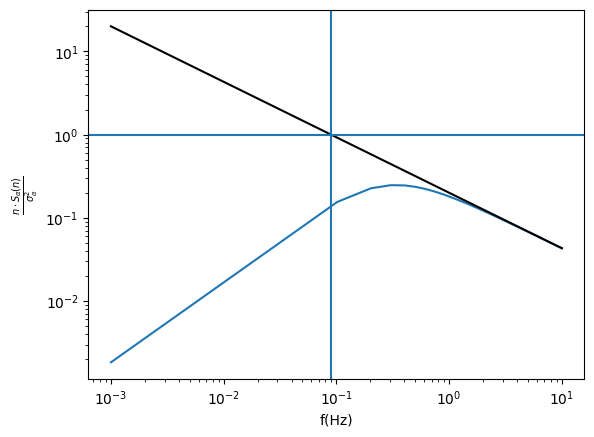

In [47]:
#on essaye de générer un spectre de référence (Kansas)
def S(f,f0=1,A=0.164):
    f_norm=f/f0
    return A*f_norm/(1.0+A*f_norm**(5.0/3.0))

x=np.linspace(1.0e-3,10.0,100)
alpha=0.2
f_0=alpha**(3.0/2.0)
plt.plot(x,S(x,f_0))
plt.plot(x,alpha*x**(-2.0/3.0),color='k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"f(Hz)")
plt.ylabel(r"$\frac{n\cdot S_\alpha (n)}{\sigma_\alpha^2}$")
#plt.ylim(top=2.0)
plt.axhline(1)
plt.axvline(f_0)

In [48]:
print(spectres_1_2min.coords['freq'].size)

50


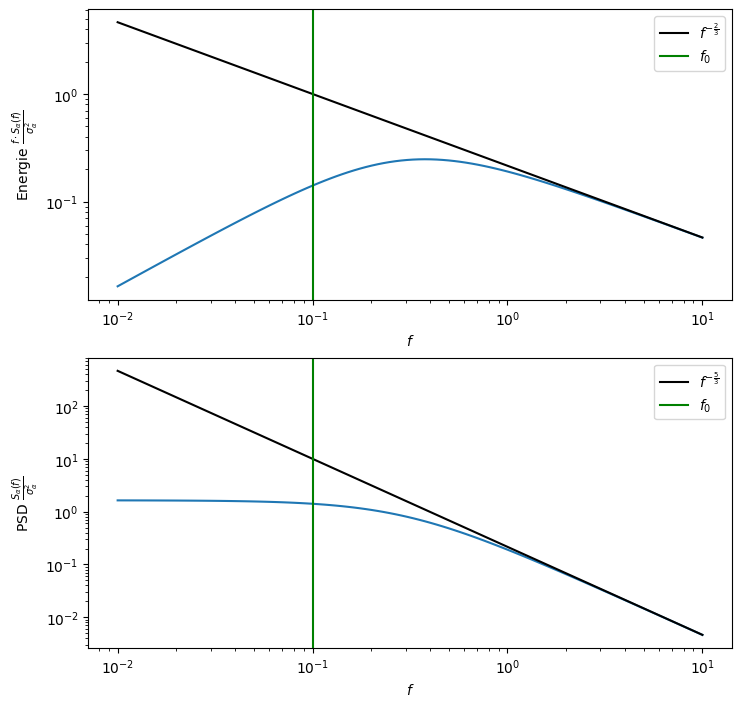

In [49]:
spectre_norm=lambda f:0.164*f/(1.0+0.164*f**(5.0/3.0))
x=np.geomspace(1.0e-2,10.0,100)
f_0=0.1
alpha=f_0**(2.0/3.0)
fig=plt.figure(figsize=(8.3,8.3))
ax1=fig.add_subplot(211)
plt.plot(x,S(x,f0=f_0))
plt.plot(x,alpha*x**(-2.0/3.0),color='k',label=r"$f^{-\frac{2}{3}}$")
plt.xscale('log')
plt.yscale('log')
plt.axvline(f_0,color='g',label="$f_0$")
plt.xlabel(r"$f$")
plt.ylabel(r"Energie $\frac{f\cdot S_\alpha (f)}{\sigma_\alpha^2}$")
plt.legend()

ax2=fig.add_subplot(212)
plt.plot(x,S(x,f0=f_0)/x)
plt.plot(x,alpha*x**(-5.0/3.0),color='k',label=r"$f^{-\frac{5}{3}}$")
plt.xscale('log')
plt.yscale('log')
plt.axvline(f_0,color='g',label="$f_0$")
plt.xlabel(r"$f$")
plt.ylabel(r"PSD $\frac{S_\alpha (f)}{\sigma_\alpha^2}$")
plt.legend()

plt.savefig(repertoire_figures+r"Kansas_curves.png")
#plt.ylim(top=2.0)

spectre 1.64*x/(7.61220568712496*x**1.66666666666667 + 1.0)
PSD 1.64/(7.61220568712496*x**1.66666666666667 + 1.0)


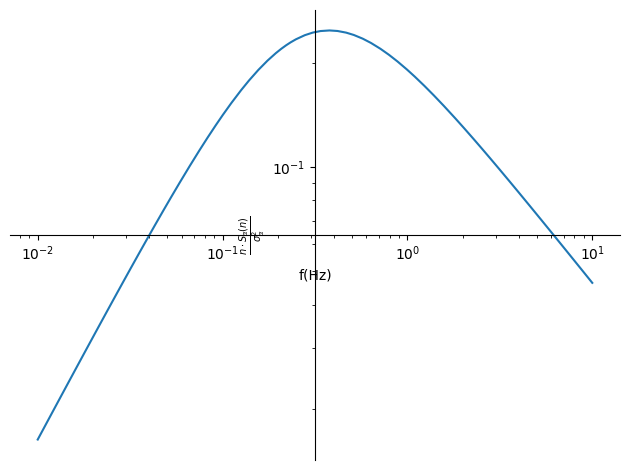

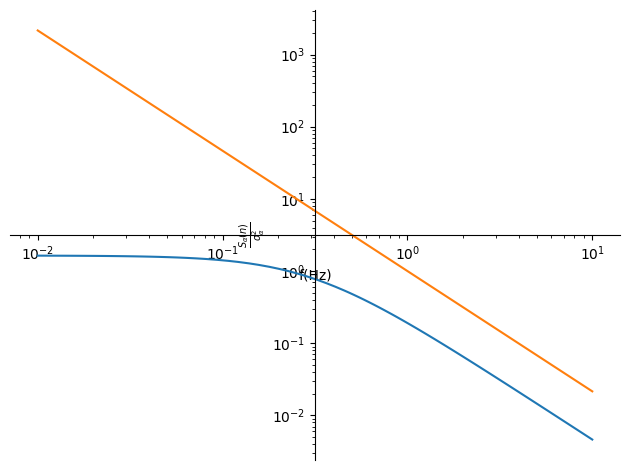

In [50]:
import sympy as sy
import sympy.plotting as splot

x = sy.Symbol('x')

TF_x=S(x,0.1)

print(f"spectre {TF_x}")

PSD_x=TF_x/x

print(f"PSD {PSD_x}")

splot.plot(TF_x, (x,1.0e-2,10.0),xscale='log',yscale='log',xlabel='f(Hz)',ylabel=r"$\frac{n\cdot S_\alpha (n)}{\sigma_\alpha^2}$")
splot.plot(PSD_x,x**(-5.0/3.0), (x,1.0e-2,10.0),xscale='log',yscale='log',xlabel='f(Hz)',ylabel=r"$\frac{S_\alpha (n)}{\sigma_\alpha^2}$")


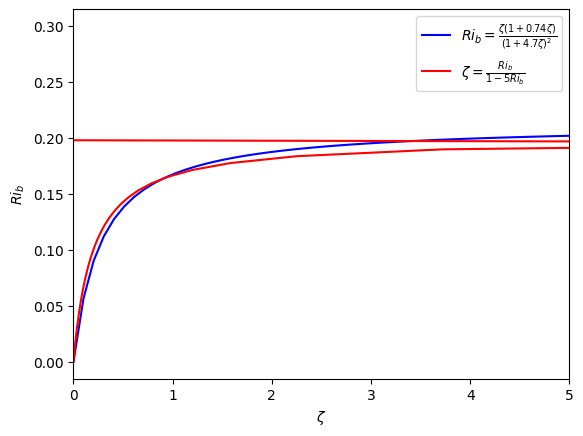

In [51]:
eta=np.linspace(0.0,5)
Ri=np.linspace(0.0,0.3)
func_Rb=lambda x:(x*(0.74+4.7*x))/((1.0+4.7*x)**2)
func_zL=lambda x:x/(1.0-5.0*x)

fig=plt.figure()
plt.plot(eta,func_Rb(eta),color='b',label=r"$Ri_b=\frac{\zeta(1+0.74\zeta )}{{(1+4.7\zeta )}^2}$")
plt.plot(func_zL(Ri),Ri,color='r',label=r"$\zeta=\frac{Ri_b}{1-5 Ri_b}$")
plt.xlabel(r"$\zeta$")
plt.ylabel(r"$Ri_b$")
plt.xlim(0,5)
plt.legend()